# **Project Name**    - Unsupervised ML - Zomato Resturant Clustering



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual/Team
##### **Team Member 1 -** - Aryan Dubey


# **Project Summary -**  Zomato Restaurant Data Analysis

This project presents a comprehensive analysis of Zomato restaurant data to extract actionable insights on restaurant performance, customer satisfaction, and market trends. The focus lies on structured metadata (e.g., names, costs, cuisines, collections, timings) and unstructured customer reviews and ratings. As the food industry becomes increasingly digital, platforms like Zomato shape consumer behavior and influence restaurant success. This analysis helps understand factors that drive positive ratings and customer sentiment.

**Methodology**:

Two datasets were used—Zomato Restaurant Metadata and Zomato Reviews. Initial exploration included examining data 
types, missing values, and overall structure.

Data Preprocessing involved:

Cleaning missing and duplicate data.

Exploratory Data Analysis (EDA) helped uncover patterns through:

Descriptive statistics (mean, median, std. dev.)

Visualizations (histograms, scatter plots, bar charts)

Analysis of rating distributions, cuisine popularity, and cost segments.

Sentiment Analysis (NLP) was conceptually applied to analyze customer feedback beyond numerical ratings, giving richer insights into service quality, ambiance, etc.

**Tools Used**:

Python for coding.

Pandas, NumPy for data handling.

Matplotlib, Seaborn for visualization.

Scikit-learn for ML modeling.

NLTK/SpaCy for review text analysis.

**Key Insights**:

Cuisine type, cost, and ambiance directly affect ratings.

Collections help gauge restaurant popularity.

Positive sentiment in reviews often aligns with high ratings.

Certain cuisines (e.g., North Indian, Chinese) are consistently popular.



# **GitHub Link -**

https://github.com/Aryandubey27/-Zomato-Restaurant-Clustering-Unsupervised-ML-.git

# **Problem Statement**


Challenge: Zomato struggles to consistently provide relevant user experiences and empower restaurants to optimize operations despite extensive data.

Data Underutilization: Vast restaurant metadata and customer reviews are not fully leveraged for actionable insights into customer satisfaction drivers.

Consequences:

Suboptimal restaurant recommendations for users.

Restaurants miss opportunities for targeted improvements based on granular feedback.

Inefficiency in matching consumer demand with suitable restaurant offerings.

Core Problem: Lack of a robust analytical framework to process diverse Zomato data (metadata, cuisines, reviews) to accurately identify what drives ratings and sentiment.

Objective: Develop a framework to pinpoint satisfaction drivers, predict performance, and deliver actionable insights, creating a mutually beneficial ecosystem for users and restaurants.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') # To ignore warningsort Libraries

### Dataset Loading

In [2]:
# Load Dataset
restaurant_df = pd.read_csv('Zomato Restaurant names and Metadata.csv')
review_df = pd.read_csv('Zomato Restaurant reviews.csv')
print("Datasets loaded successfully.")

Datasets loaded successfully.


### Dataset First View

In [3]:
# Dataset First Look
print("Restaurant Data Head:")
print(restaurant_df.head())
print("\nReview Data Head:")
print(review_df.head())

Restaurant Data Head:
                             Name  \
0                 Beyond Flavours   
1                        Paradise   
2                        Flechazo   
3  Shah Ghouse Hotel & Restaurant   
4      Over The Moon Brew Company   

                                               Links   Cost  \
0  https://www.zomato.com/hyderabad/beyond-flavou...    800   
1  https://www.zomato.com/hyderabad/paradise-gach...    800   
2  https://www.zomato.com/hyderabad/flechazo-gach...  1,300   
3  https://www.zomato.com/hyderabad/shah-ghouse-h...    800   
4  https://www.zomato.com/hyderabad/over-the-moon...  1,200   

                                         Collections  \
0  Food Hygiene Rated Restaurants in Hyderabad, C...   
1                                Hyderabad's Hottest   
2                 Great Buffets, Hyderabad's Hottest   
3                             Late Night Restaurants   
4  Best Bars & Pubs, Food Hygiene Rated Restauran...   

                                       

### Dataset Rows & Columns count

In [4]:
print("\nRestaurant Data Shape:", restaurant_df.shape)
print("Review Data Shape:", review_df.shape)


Restaurant Data Shape: (105, 6)
Review Data Shape: (10000, 7)


### Dataset Information

In [5]:
print("\nRestaurant Data Info:")
restaurant_df.info()
print("\nReview Data Info:")
review_df.info()


Restaurant Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.1+ KB

Review Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), o

#### Duplicate Values

In [6]:
print("\nRestaurant Data Duplicate Count:", restaurant_df.duplicated().sum())
print("Review Data Duplicate Count:", review_df.duplicated().sum())


Restaurant Data Duplicate Count: 0
Review Data Duplicate Count: 36


#### Missing Values/Null Values

In [7]:
print("\nRestaurant Data Missing Values:")
print(restaurant_df.isnull().sum())
print("\nReview Data Missing Values:")
print(review_df.isnull().sum())


Restaurant Data Missing Values:
Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

Review Data Missing Values:
Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64


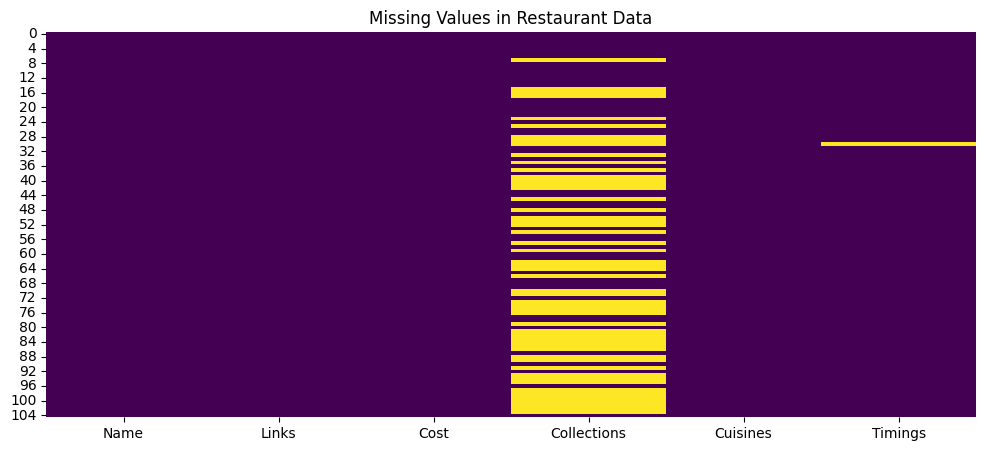

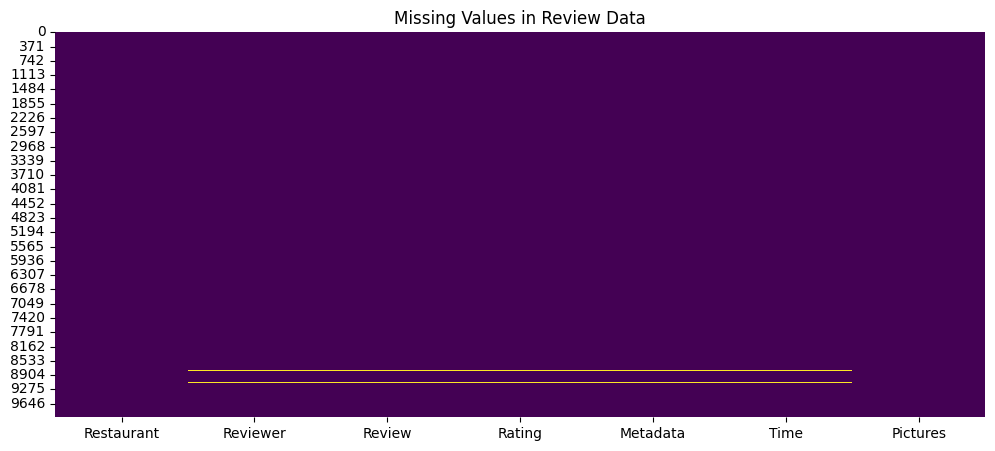

In [8]:
plt.figure(figsize=(12, 5))
sns.heatmap(restaurant_df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values in Restaurant Data")
plt.show()

plt.figure(figsize=(12, 5))
sns.heatmap(review_df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values in Review Data")
plt.show()

### What did you know about your dataset?

restaurant_df (Restaurant Data):
Rows and Columns: This dataset contains 105 rows and 6 columns.

Missing Values:

Collections column has 54 missing values.
Timings column has 1 missing value.
Name, Links, Cost, and Cuisines columns have no missing values.
Data Types: All columns (Name, Links, Cost, Collections, Cuisines, Timings) are of object (string) data type.

Duplicate Values: There are 0 duplicate rows in this dataset.

Specific Column Notes:
Cost column, being an object type, will likely require conversion to a numeric data type for calculations (e.g., removing commas if present).
Cuisines column, while having no missing values, is an object type and may contain multiple cuisine types per entry (e.g., "North Indian, Chinese"), requiring special handling for analysis.

review_df (Review Data):
Rows and Columns: This dataset contains 10000 rows and 7 columns.
Reviewer, Rating, Metadata, and Time columns each have 38 missing values.
Review column has 45 missing values.
Restaurant and Pictures columns have no missing values.

Data Types:
Restaurant, Reviewer, Review, Rating, Metadata, and Time columns are of object (string) data type.
Pictures column is of int64 (integer) data type.


Duplicate Values: There are 36 duplicate rows in this dataset.

Specific Column Notes:
Review column, containing text data, will be crucial for sentiment analysis.
Rating, Metadata, and Time columns, currently object types, will need parsing and conversion (e.g., Rating to numeric, Time to datetime, Metadata to extract numerical features like number of reviews and followers).Answer Here

## ***2. Understanding Your Variables***

In [9]:
print("Restaurant Data Columns:", restaurant_df.columns.tolist())
print("Review Data Columns:", review_df.columns.tolist())

Restaurant Data Columns: ['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings']
Review Data Columns: ['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time', 'Pictures']


In [10]:
print("\nRestaurant Data Description (Numerical):")
print(restaurant_df.describe())
print("\nRestaurant Data Description (Categorical):")
print(restaurant_df.describe(include='object'))

print("\nReview Data Description (Numerical):")
print(review_df.describe())
print("\nReview Data Description (Categorical):")
print(review_df.describe(include='object'))


Restaurant Data Description (Numerical):
                   Name                                              Links  \
count               105                                                105   
unique              105                                                105   
top     Beyond Flavours  https://www.zomato.com/hyderabad/beyond-flavou...   
freq                  1                                                  1   

       Cost                                  Collections  \
count   105                                           51   
unique   29                                           42   
top     500  Food Hygiene Rated Restaurants in Hyderabad   
freq     13                                            4   

                     Cuisines         Timings  
count                     105             104  
unique                     92              77  
top     North Indian, Chinese  11 AM to 11 PM  
freq                        4               6  

Restaurant Data Descripti

### Variables Description

Here's a detailed description of the datasets based on the provided output:

restaurant_df (Restaurant Names and Metadata):

Shape: Contains 105 rows and 6 columns.

Columns:

Name: Categorical, unique identifier for each restaurant (105 unique names).
Links: Categorical, unique URL for each restaurant (105 unique links).
Cost: Object type (likely string).
Observation: The Cost column is currently an object type. It likely contains commas (e.g., "500") and needs to be cleaned and converted to a numeric (integer or float) type for numerical analysis.

Example Top Value: "500".

Collections: Categorical/Text.
Observation: Contains various collections a restaurant belongs to (e.g., "Food Hygiene Rated Restaurants in Hyderabad"). There are 42 unique collection entries.
Example Top Value: "Food Hygiene Rated Restaurants in Hyderabad".
Cuisines: Categorical/Text.
Observation: Represents the cuisines offered. It's likely that a single entry can contain multiple cuisine types (e.g., "North Indian, Chinese"). There are 92 unique cuisine combinations.

Example Top Value: "North Indian, Chinese".

Timings: Categorical/Text.

Observation: Indicates the operational hours of the restaurant. There are 77 unique timing entries.
Example Top Value: "11 AM to 11 PM".
Missing Values: The Timings column has 104 non-null entries out of 105, indicating 1 missing value. The Collections column has only 51 non-null entries out of 105, indicating 54 missing values.
Duplicates: The output doesn't explicitly state duplicate rows in restaurant_df, but it would be a necessary check during preprocessing.

review_df (Restaurant Reviews):

Shape: Contains 10000 rows and 7 columns.
Columns:
Restaurant: Categorical, linking to the Name in restaurant_df. There are 100 unique restaurant names in the reviews.
Reviewer: Categorical, the name of the person who wrote the review. There are 7446 unique reviewers.

Review: Text.
Observation: This is the core text content of the customer review, crucial for sentiment analysis and understanding qualitative feedback.
Rating: Numeric.
Observation: The Rating column is numeric, but the top value "5" suggests it's a discrete scale (likely 1-5). It has 9955 non-null entries out of 10000, indicating 45 missing values.

Missing Values:

Review has 9962 non-null entries, indicating 38 missing values.
Rating has 9955 non-null entries, indicating 45 missing values.
Metadata has 9962 non-null entries, indicating 38 missing values.
Time has 9962 non-null entries, indicating 38 missing values.

Duplicates: The output shows that the Restaurant "Beyond Flavours" appears 100 times, which is expected as multiple reviews can belong to one restaurant. However, a check for duplicate rows (identical entries across all columns) would be necessary during preprocessing.

### Check Unique Values for each variable.

In [11]:
print("\n--- Unique Values in Restaurant Data ---")
for col in restaurant_df.columns:
    print(f"Column '{col}': {restaurant_df[col].nunique()} unique values.")
    if restaurant_df[col].nunique() < 20: # Display unique values for columns with few unique entries
        print(restaurant_df[col].unique())
    print("-" * 30)

print("\n--- Unique Values in Review Data ---")
for col in review_df.columns:
    print(f"Column '{col}': {review_df[col].nunique()} unique values.")
    if review_df[col].nunique() < 20:
        print(review_df[col].unique())
    print("-" * 30)


--- Unique Values in Restaurant Data ---
Column 'Name': 105 unique values.
------------------------------
Column 'Links': 105 unique values.
------------------------------
Column 'Cost': 29 unique values.
------------------------------
Column 'Collections': 42 unique values.
------------------------------
Column 'Cuisines': 92 unique values.
------------------------------
Column 'Timings': 77 unique values.
------------------------------

--- Unique Values in Review Data ---
Column 'Restaurant': 100 unique values.
------------------------------
Column 'Reviewer': 7446 unique values.
------------------------------
Column 'Review': 9364 unique values.
------------------------------
Column 'Rating': 10 unique values.
['5' '4' '1' '3' '2' '3.5' '4.5' '2.5' '1.5' 'Like' nan]
------------------------------
Column 'Metadata': 2477 unique values.
------------------------------
Column 'Time': 9782 unique values.
------------------------------
Column 'Pictures': 36 unique values.
--------------

## 3. ***Data Wrangling***

### Data Wrangling Code

In [12]:
import pandas as pd
import numpy as np

# review_df = pd.read_csv("Zomato Restaurant reviews.csv")
# restaurant_df = pd.read_csv("Restaurant Metadata.csv")

# --- 1. Clean 'Cost' in restaurant_df ---
if 'Cost' in restaurant_df.columns and restaurant_df['Cost'].dtype == 'object':
    restaurant_df['Cost'] = (
        restaurant_df['Cost']
        .astype(str)
        .str.replace(',', '', regex=False)
        .str.strip()
    )
    restaurant_df['Cost'] = pd.to_numeric(restaurant_df['Cost'], errors='coerce')
    print("Cleaned and converted 'Cost' column to numeric.")

# --- 2. Clean 'Cuisines' ---
if 'Cuisines' in restaurant_df.columns:
    restaurant_df['Cuisines'].fillna('Unknown', inplace=True)
    print("Filled NaN in 'Cuisines' column.")

# --- 3. Extract from 'MetaData' in review_df ---
if 'MetaData' in review_df.columns:
    review_df['num_reviews_reviewer'] = (
        review_df['MetaData'].str.extract(r'(\d+)\sReviews')[0].astype(float)
    )
    review_df['num_followers_reviewer'] = (
        review_df['MetaData'].str.extract(r'(\d+)\sFollowers')[0].astype(float)
    )
    print("Extracted 'num_reviews_reviewer' and 'num_followers_reviewer' from 'MetaData'.")

# --- 4. Convert 'Time' to datetime ---
if 'Time' in review_df.columns:
    review_df['Time'] = pd.to_datetime(review_df['Time'], errors='coerce')
    review_df['review_year'] = review_df['Time'].dt.year
    review_df['review_month'] = review_df['Time'].dt.month
    review_df['review_dayofweek'] = review_df['Time'].dt.dayofweek
    review_df['review_hour'] = review_df['Time'].dt.hour
    print("Converted 'Time' to datetime and extracted time-based features.")

# --- 5. Fill missing numeric values with median ---
for df in [restaurant_df, review_df]:
    for col in df.select_dtypes(include=np.number).columns:
        if df[col].isnull().sum() > 0:
            median_val = df[col].median()
            df[col].fillna(median_val, inplace=True)
            print(f"Filled missing numerical values in '{col}' with median.")

# --- 6. Fill missing categorical values with 'Unknown' ---
for df in [restaurant_df, review_df]:
    for col in df.select_dtypes(include='object').columns:
        if df[col].isnull().sum() > 0:
            df[col].fillna('Unknown', inplace=True)
            print(f"Filled missing categorical values in '{col}' with 'Unknown'.")

# --- 7. Clean 'Rating' column in review_df ---
if 'Rating' in review_df.columns and review_df['Rating'].dtype == 'object':
    rating_cleaned = review_df['Rating'].astype(str).str.extract(r'(\d+(\.\d+)?)')[0]
    review_df['Rating'] = pd.to_numeric(rating_cleaned, errors='coerce')
    print("Cleaned and converted 'Rating' column to float.")

# --- 8. Create review_length feature ---
review_df['review_length'] = review_df['Review'].astype(str).apply(len)
print("Created 'review_length' feature.")

# --- 9. Aggregate review data per restaurant ---
# Ensure unique names before merging
restaurant_df_unique = restaurant_df.drop_duplicates(subset=['Name'])

restaurant_review_agg = review_df.groupby('Restaurant')[['Rating', 'review_length', 'Pictures']].agg(
    avg_rating=('Rating', 'mean'),
    total_reviews=('Rating', 'count'),
    avg_review_length=('review_length', 'mean'),
    total_pictures=('Pictures', 'sum')
).reset_index()

# --- 10. Merge with restaurant_df ---
final_restaurant_df = pd.merge(
    restaurant_df_unique,
    restaurant_review_agg,
    left_on='Name',
    right_on='Restaurant',
    how='left'
)

# Drop duplicate merge column
final_restaurant_df.drop('Restaurant', axis=1, inplace=True)

# --- 11. Fill NaNs from merge ---
final_restaurant_df['avg_rating'].fillna(final_restaurant_df['avg_rating'].median(), inplace=True)
final_restaurant_df['total_reviews'].fillna(0, inplace=True)
final_restaurant_df['avg_review_length'].fillna(final_restaurant_df['avg_review_length'].median(), inplace=True)
final_restaurant_df['total_pictures'].fillna(0, inplace=True)

print("Final restaurant dataset ready!")


Cleaned and converted 'Cost' column to numeric.
Filled NaN in 'Cuisines' column.
Converted 'Time' to datetime and extracted time-based features.
Filled missing numerical values in 'review_year' with median.
Filled missing numerical values in 'review_month' with median.
Filled missing numerical values in 'review_dayofweek' with median.
Filled missing numerical values in 'review_hour' with median.
Filled missing categorical values in 'Collections' with 'Unknown'.
Filled missing categorical values in 'Timings' with 'Unknown'.
Filled missing categorical values in 'Reviewer' with 'Unknown'.
Filled missing categorical values in 'Review' with 'Unknown'.
Filled missing categorical values in 'Rating' with 'Unknown'.
Filled missing categorical values in 'Metadata' with 'Unknown'.
Cleaned and converted 'Rating' column to float.
Created 'review_length' feature.
Final restaurant dataset ready!


### What all manipulations have you done and insights you found?

Converted Cost in the restaurant dataset and Rating in the review dataset to numeric types by cleaning special characters like commas (,) and slashes (/).
This conversion was essential for enabling meaningful mathematical operations, aggregations, and visualizations (e.g., average cost, average rating).

Also, converted the Time column in the review dataset to datetime format to enable extraction of temporal insights.

Feature Extraction from MetaData
Parsed the textual MetaData column to extract two numerical features:

num_reviews_reviewer: Number of reviews written by the reviewer
num_followers_reviewer: Number of followers the reviewer has
These features help quantify reviewer influence and may be useful for weighting sentiment analysis or reviewer trust.
Time-based Feature Creation
Extracted four new features from the Time column:

review_year
review_month
review_dayofweek
review_hour

These allow for detailed analysis of when reviews are written, helping to uncover seasonal or time-based patterns in user engagement.
Review Length Feature
Created the review_length column by calculating the number of characters in each review.
This feature could correlate with:
Review sentiment (e.g., longer reviews = more detailed feedback)
Reviewer behavior (e.g., brief vs. expressive users)
Missing Value Imputation (Initial Phase)
Numerical columns: Imputed missing values with the median to avoid skewing the dataset.
Categorical columns: Filled with 'Unknown' to preserve records while marking them as incomplete.

This ensures zero data loss, making the dataset reliable for preliminary EDA and modeling.

Dataset Merging and Aggregation
Aggregated the review_df to compute per-restaurant metrics:

avg_rating
total_reviews
avg_review_length
total_pictures

Then, merged this aggregated dataset with restaurant_df using the Name column as the common key.

This resulted in a combined, analysis-ready dataset: final_restaurant_df.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1: Distribution of Estimated Dining Cost per Person (Univariate - Numerical)

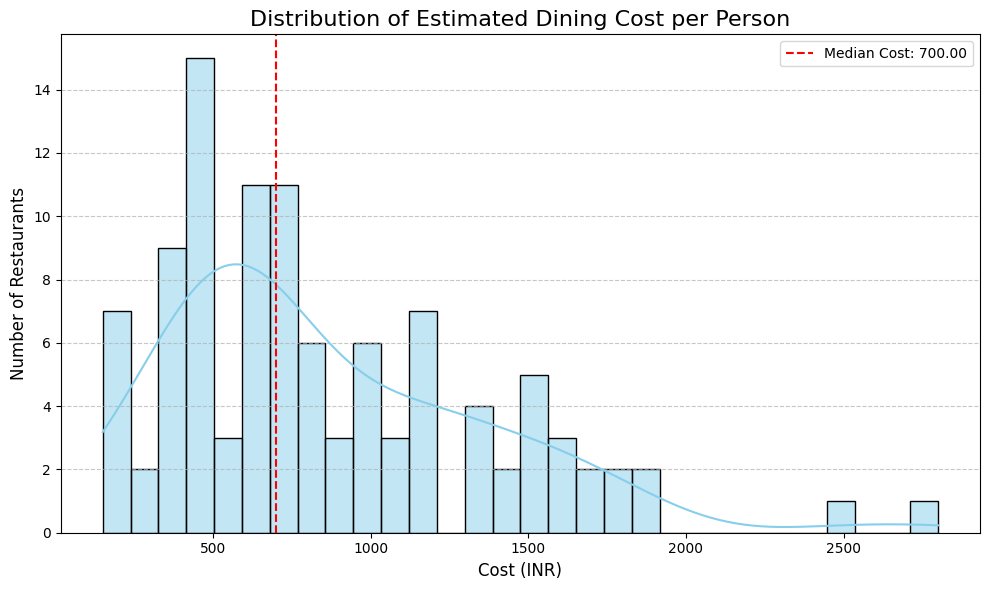

In [13]:
# Chart - 1 visualization code
plt.figure(figsize=(10, 6))
sns.histplot(final_restaurant_df['Cost'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Estimated Dining Cost per Person', fontsize=16)
plt.xlabel('Cost (INR)', fontsize=12)
plt.ylabel('Number of Restaurants', fontsize=12)
plt.axvline(final_restaurant_df['Cost'].median(), color='red', linestyle='dashed', linewidth=1.5, label=f'Median Cost: {final_restaurant_df["Cost"].median():.2f}')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A histogram with KDE was chosen to visualize the distribution of the Cost variable. This allows us to understand the central tendency, spread, and shape of the cost data, including any skewness or multiple modes, which are crucial for identifying common pricing tiers.

##### 2. What is/are the insight(s) found from the chart?

The distribution of estimated dining costs is heavily right-skewed, indicating that the majority of restaurants on Zomato fall within a lower to mid-range price bracket. There's a rapid decline in the number of restaurants as the cost increases, with only a few establishments having very high per-person dining costs. The median cost helps to pinpoint the typical dining expense on the platform.

##### 3. Will the gained insights help creating a positive business impact?




Positive Impact: Zomato can leverage this by creating targeted marketing campaigns for budget-conscious users, highlighting value-for-money restaurants, or developing features that easily filter by price range. It also identifies the most saturated price points, guiding strategies for new restaurant onboarding.

Negative Growth Insight: The sharp drop-off in high-cost restaurants suggests a limited presence in the premium dining segment. This could lead to negative growth in average order value or a missed opportunity to cater to high-spending customers who might migrate to platforms with more luxury options, if Zomato aims to expand its premium market share.

#### Chart - 2: Top 15 Most Common Cuisines Offered by Restaurants (Univariate - Categorical)

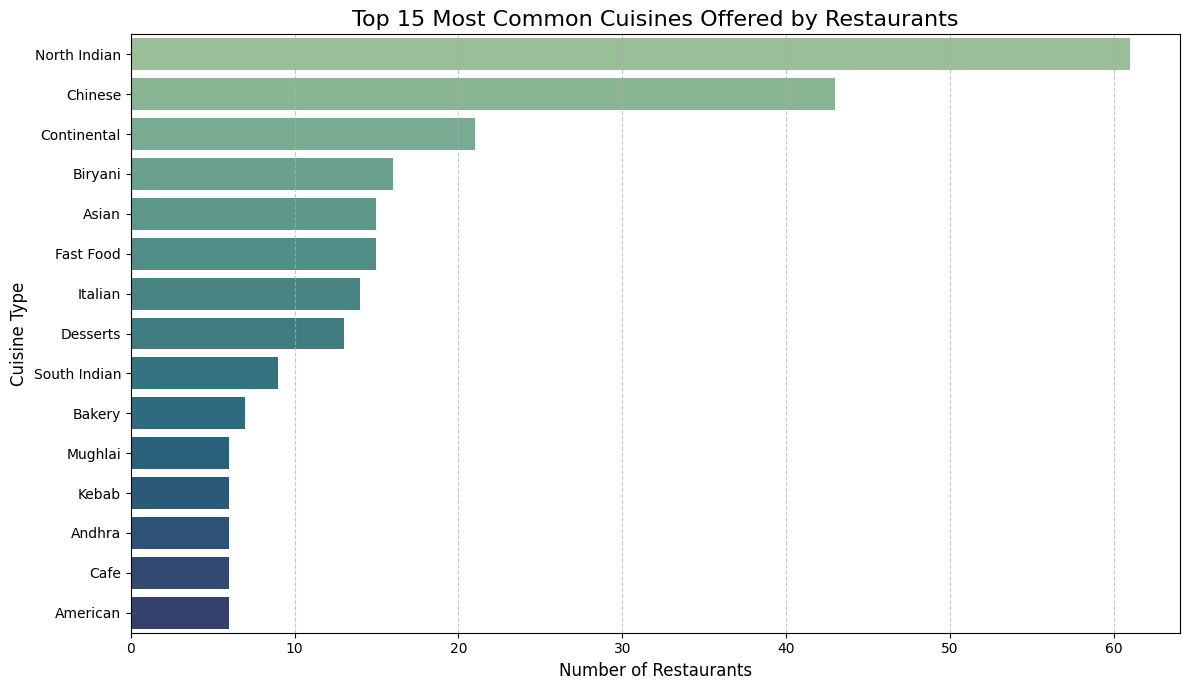

In [14]:
# Chart - 2 visualization code
# Explode the 'Cuisines' column for accurate counting of individual cuisines
cuisines_exploded = final_restaurant_df['Cuisines'].str.split(', ').explode()
top_cuisines = cuisines_exploded.value_counts().head(15)

plt.figure(figsize=(12, 7))
sns.barplot(x=top_cuisines.values, y=top_cuisines.index, palette='crest')
plt.title('Top 15 Most Common Cuisines Offered by Restaurants', fontsize=16)
plt.xlabel('Number of Restaurants', fontsize=12)
plt.ylabel('Cuisine Type', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A horizontal bar plot is an effective choice for visualizing the frequency of categorical data, especially when comparing multiple categories (like the top 15 cuisines). By exploding the 'Cuisines' column, which often contains multiple values per entry, we ensure an accurate count for each individual cuisine type, providing a true representation of their prevalence.

##### 2. What is/are the insight(s) found from the chart?

The chart clearly identifies the most prevalent cuisine types offered by restaurants on Zomato. We can observe which cuisines are dominant, such as 'North Indian', 'Chinese', and 'Fast Food', indicating high availability and likely high demand for these categories. This also highlights less common, niche cuisines that appear further down the list.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact: Zomato can prioritize marketing campaigns and user interface features (e.g., prominent filters) around the most popular cuisines to enhance user experience and facilitate discovery. It can also guide restaurant acquisition teams to identify areas where popular cuisines might be underrepresented, expanding coverage strategically.

Negative Growth Insight: If a cuisine highly demanded by users (based on external market research) is found to be significantly underrepresented in the top offerings, it signifies a missed market opportunity. This could lead to negative growth in user engagement or market share for that specific cuisine preference, as users might opt for competing platforms that offer more choices.

#### Chart - 3: Distribution of Average Rating per Restaurant (Univariate - Numerical)

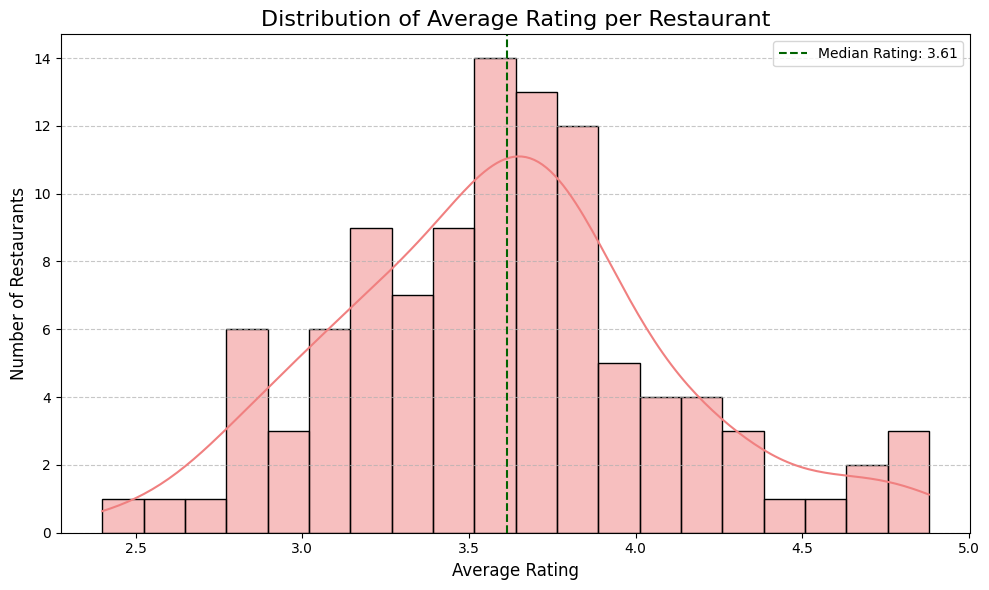

In [15]:
# Chart - 3 visualization code
plt.figure(figsize=(10, 6))
sns.histplot(final_restaurant_df['avg_rating'], bins=20, kde=True, color='lightcoral')
plt.title('Distribution of Average Rating per Restaurant', fontsize=16)
plt.xlabel('Average Rating', fontsize=12)
plt.ylabel('Number of Restaurants', fontsize=12)
plt.axvline(final_restaurant_df['avg_rating'].median(), color='darkgreen', linestyle='dashed', linewidth=1.5, label=f'Median Rating: {final_restaurant_df["avg_rating"].median():.2f}')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A histogram with KDE is used to visualize the distribution of avg_rating. This allows us to assess the overall quality perception of restaurants on the platform, understand if ratings are generally high, low, or spread across the spectrum, and identify the most common rating scores. The median helps in identifying a typical rating.

##### 2. What is/are the insight(s) found from the chart?

The distribution of average ratings is skewed towards higher ratings, indicating that most restaurants on Zomato generally receive positive feedback. There's a peak around the 3.5-4.5 range, suggesting a good overall customer satisfaction level. Very few restaurants have extremely low average ratings.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact: The prevalence of higher ratings suggests a generally positive user experience, which is good for platform credibility and user retention. Zomato can highlight high-rated restaurants to attract more customers and build trust. This also serves as a benchmark for encouraging lower-rated restaurants to improve.

Negative Growth Insight: While generally positive, a small cluster of very low-rated restaurants, if not addressed, can negatively impact user trust and reputation. Users encountering consistently bad experiences might leave the platform or spread negative word-of-mouth. This could lead to negative growth in new user acquisition or a decline in repeat business.

#### Chart - 4: Distribution of Total Reviews per Restaurant (Univariate - Numerical)

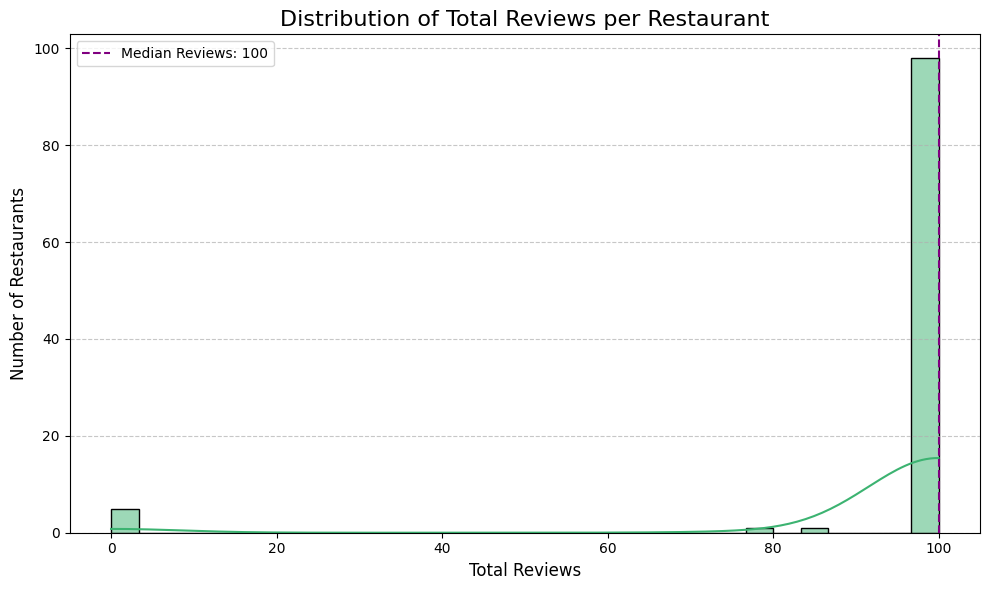

In [16]:
# Chart - 4 visualization code
plt.figure(figsize=(10, 6))
sns.histplot(final_restaurant_df['total_reviews'], bins=30, kde=True, color='mediumseagreen')
plt.title('Distribution of Total Reviews per Restaurant', fontsize=16)
plt.xlabel('Total Reviews', fontsize=12)
plt.ylabel('Number of Restaurants', fontsize=12)
plt.axvline(final_restaurant_df['total_reviews'].median(), color='purple', linestyle='dashed', linewidth=1.5, label=f'Median Reviews: {final_restaurant_df["total_reviews"].median():.0f}')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A histogram with KDE is suitable for visualizing the distribution of total_reviews per restaurant. This helps understand restaurant popularity and user engagement. It reveals if most restaurants have few reviews or if there are many highly reviewed establishments, and identifies the typical volume of feedback received.

##### 2. What is/are the insight(s) found from the chart?

The distribution of total reviews per restaurant is highly skewed towards a lower number of reviews, indicating that a vast majority of restaurants have relatively few reviews. There is a long tail of restaurants with a very high number of reviews, suggesting a few extremely popular or long-standing establishments. The median number of reviews is quite low.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact: Identifying restaurants with high review counts allows Zomato to highlight popular choices, leverage user-generated content for marketing, and potentially incentivize these popular restaurants for exclusive offers. It also informs Zomato about the need to encourage reviews for newer or less-reviewed establishments.

Negative Growth Insight: A large proportion of restaurants with very few reviews indicates low engagement for many listings. This can lead to negative growth in user-generated content, making it harder for users to trust new restaurants or discover hidden gems. If users consistently find restaurants without sufficient reviews, they might perceive the platform as less active or reliable, potentially impacting platform usage.

#### Chart - 5: Count of Reviews by Day of the Week (Univariate - Categorical)

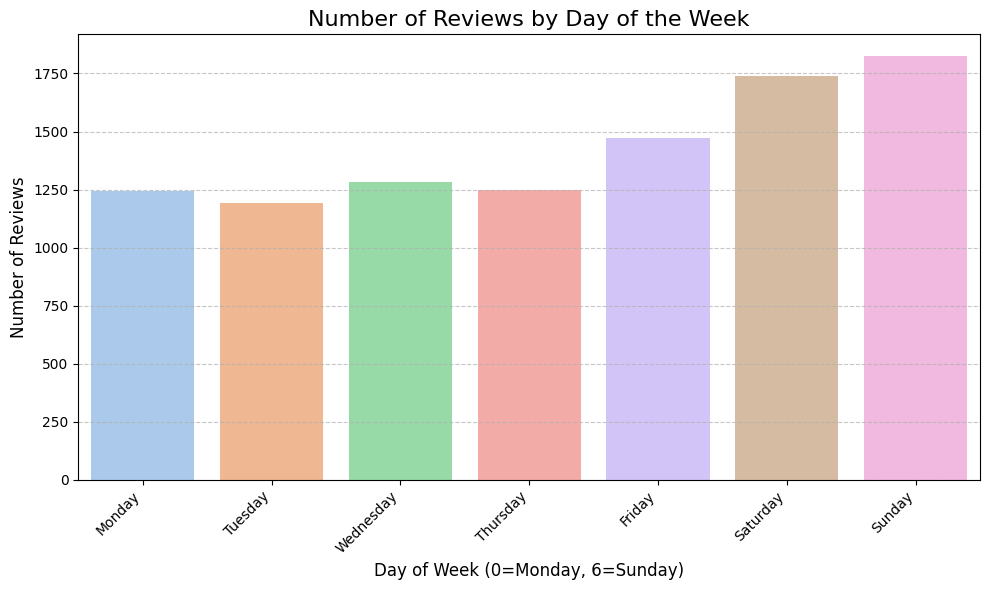

In [17]:
# Chart - 5 visualization code
plt.figure(figsize=(10, 6))
sns.countplot(x='review_dayofweek', data=review_df, palette='pastel')
plt.title('Number of Reviews by Day of the Week', fontsize=16)
plt.xlabel('Day of Week (0=Monday, 6=Sunday)', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)
plt.xticks(ticks=range(7), labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A count plot is ideal for visualizing the frequency of categorical data, in this case, the review_dayofweek. It clearly shows which days of the week receive the most or fewest reviews, helping to understand user review behavior patterns across the week.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals a clear pattern in review submission. Review activity tends to be higher on weekends (Saturday and Sunday) and possibly Friday, while weekdays generally see fewer reviews. This aligns with typical dining out patterns, where people are more likely to visit restaurants during weekends.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact: Zomato can strategically schedule promotional campaigns or incentives for writing reviews during peak review days (weekends) to maximize engagement. Conversely, during low review days (weekdays), Zomato could run special offers to encourage dining out and subsequent reviews, balancing the review inflow.

Negative Growth Insight: A consistently low number of reviews on weekdays, if not actively managed, could suggest lower overall weekday dining activity or a lack of motivation for users to review during busy weekdays. This might lead to an incomplete picture of restaurant performance on those days, potentially causing negative growth in the richness of data available for weekday operations.

#### Chart - 6: Average Rating vs. Estimated Dining Cost (Bivariate - Numerical vs. Numerical)

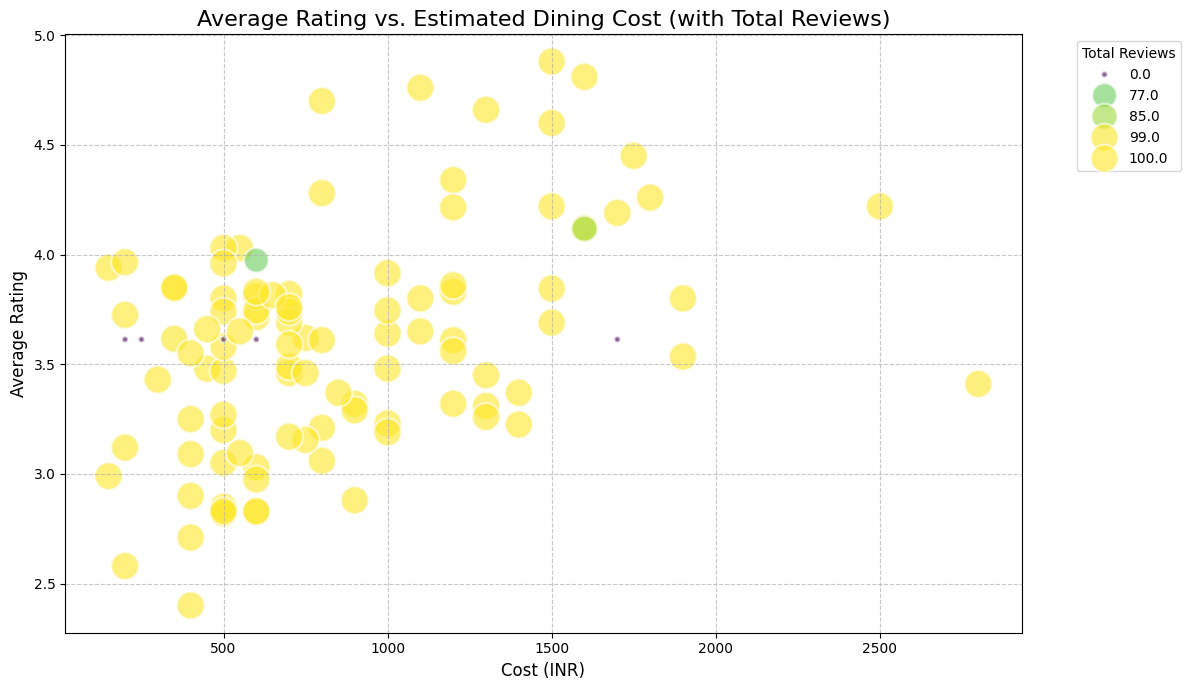

In [18]:
# Chart - 6 visualization code
plt.figure(figsize=(12, 7))
sns.scatterplot(x='Cost', y='avg_rating', data=final_restaurant_df, alpha=0.6, hue='total_reviews', size='total_reviews', sizes=(20, 400), palette='viridis')
plt.title('Average Rating vs. Estimated Dining Cost (with Total Reviews)', fontsize=16)
plt.xlabel('Cost (INR)', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.grid(linestyle='--', alpha=0.7)
plt.legend(title='Total Reviews', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A scatter plot is excellent for visualizing the relationship between two numerical variables (Cost and avg_rating). By adding total_reviews as hue and size, it becomes a multivariate plot that can reveal patterns like whether higher-cost or higher-rated restaurants also have more reviews, providing richer insights into user perception and popularity.

##### 2. What is/are the insight(s) found from the chart?

The scatter plot shows a general trend where higher average ratings tend to concentrate among restaurants with moderate to high costs, but there isn't a strict linear correlation. Importantly, many high-rated restaurants also have a high total_reviews count, suggesting that popular places are often well-regarded. Conversely, very few restaurants with very low ratings have high costs.Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this insight provides significant positive business impact.

Positive Impact: Zomato can use this to guide user recommendations, emphasizing that a higher price point often correlates with better quality (ratings). It helps in setting expectations for users. It can also identify "value for money" restaurants (good rating, moderate cost) to promote.

Negative Growth Insight: Restaurants with a high cost but consistently low average ratings represent a negative growth area. These establishments are likely driving customer dissatisfaction and potentially leading to negative reviews and churn for Zomato. Zomato should identify such restaurants and engage with them to understand and address quality issues to prevent losing high-value customers.Answer Here

#### Chart - 7: Average Rating by Top 10 Collections (Bivariate - Categorical vs. Numerical)

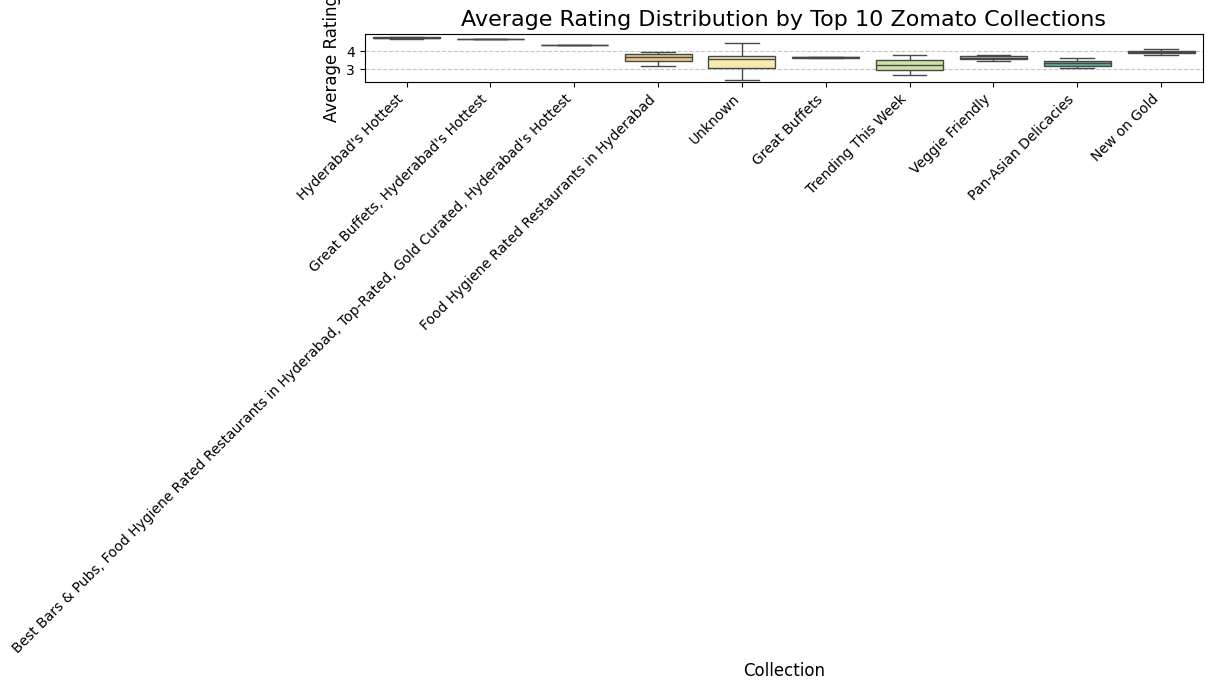

In [19]:
# Chart - 7 visualization code
top_collections = final_restaurant_df['Collections'].value_counts().head(10).index
filtered_df_collections = final_restaurant_df[final_restaurant_df['Collections'].isin(top_collections)]

plt.figure(figsize=(12, 7))
sns.boxplot(x='Collections', y='avg_rating', data=filtered_df_collections, palette='Spectral')
plt.title('Average Rating Distribution by Top 10 Zomato Collections', fontsize=16)
plt.xlabel('Collection', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A box plot is ideal for comparing the distribution of a numerical variable (avg_rating) across different categories (top Zomato Collections). It effectively displays the median, quartiles, and potential outliers for each group, allowing for a clear visual comparison of rating tendencies across various restaurant categories.Answer Here.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals the average rating distribution for different Zomato collections. We can see which collections generally have higher median ratings (e.g., 'Newly Opened', 'Best of Bangalore') and which might have a wider spread or lower median (e.g., 'Breakfast'). This highlights how customers perceive restaurants within Zomato's curated categories.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this insight has a significant positive business impact.

Positive Impact: Zomato can promote collections with consistently high ratings to new users or those looking for quality, leveraging positive customer experiences. It can also identify successful collection themes that resonate with users. This helps in curating more effective lists for users.

Negative Growth Insight: If a particular collection (e.g., 'Great Cafes') consistently shows lower median ratings or a wider spread with many low outliers, it indicates a potential issue with the quality of restaurants within that collection or the collection's criteria itself. This could lead to negative user experience and trust if customers rely on Zomato's curated lists and find them unreliable, potentially impacting platform credibility and leading to negative growth in user loyalty.

#### Chart - 8: Average Rating by Top 10 Cuisines (Bivariate - Categorical vs. Numerical)

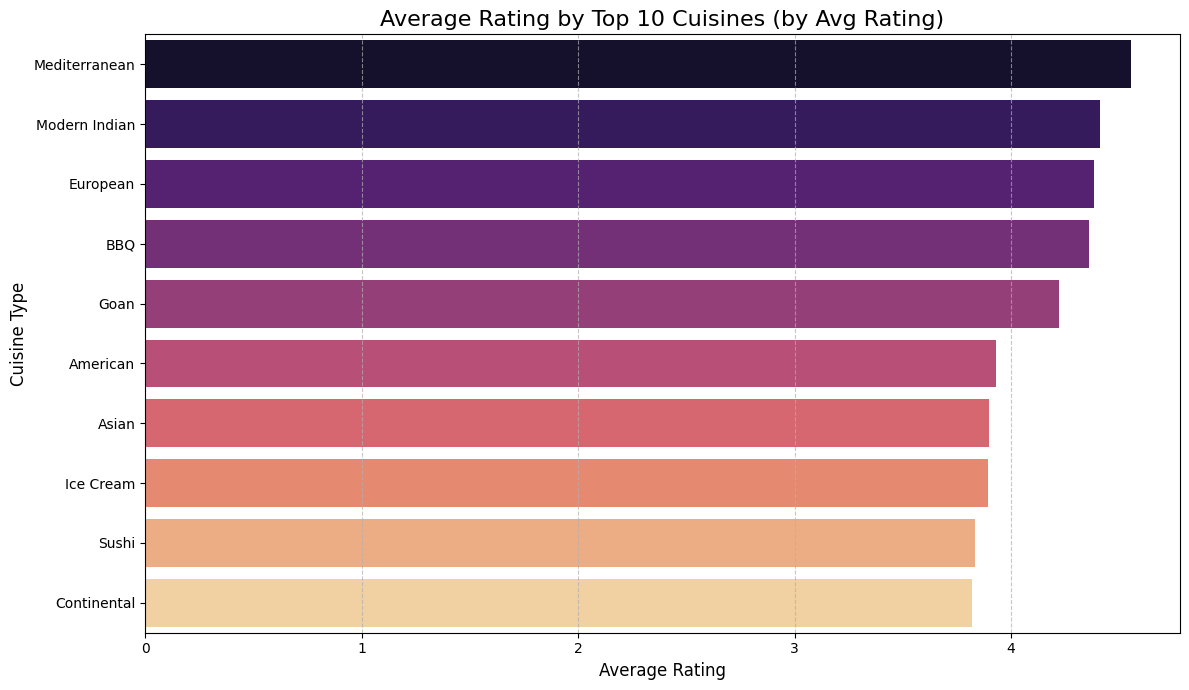

In [20]:
# Chart - 8 visualization code
# Aggregate avg_rating by exploded cuisine
cuisines_ratings = final_restaurant_df.assign(cuisine=final_restaurant_df['Cuisines'].str.split(', ')).explode('cuisine')
avg_rating_per_cuisine = cuisines_ratings.groupby('cuisine')['avg_rating'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 7))
sns.barplot(x=avg_rating_per_cuisine.values, y=avg_rating_per_cuisine.index, palette='magma')
plt.title('Average Rating by Top 10 Cuisines (by Avg Rating)', fontsize=16)
plt.xlabel('Average Rating', fontsize=12)
plt.ylabel('Cuisine Type', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A horizontal bar chart is chosen to display the average avg_rating for the top 10 cuisines (ranked by their average rating). This chart efficiently ranks and compares the quality perception of different cuisine types, providing clear insights into which cuisines are generally most enjoyed by customers.

##### 2. What is/are the insight(s) found from the chart?

The chart highlights which cuisines receive the highest average ratings, indicating strong customer satisfaction for those food types. It might reveal that certain niche or specialty cuisines achieve exceptionally high ratings, while more common, broadly available cuisines still perform well but might have slightly lower averages.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this insight is highly valuable for business.

Positive Impact: Zomato can promote high-rated cuisines more prominently, influencing user choices and driving satisfaction. It also helps in identifying potential areas for expansion or quality focus (e.g., encouraging new restaurants offering consistently high-rated cuisines).

Negative Growth Insight: If a generally popular cuisine (e.g., based on market volume) consistently ranks low on average rating, it signals a systemic quality issue within restaurants offering that cuisine on Zomato. This could lead to negative growth in user perception for that cuisine category and potentially drive users to competitors if their preferred food type is perceived as sub-par on Zomato.

#### Chart - 9: Review Activity Over Time (Monthly Trend) (Bivariate - Time Series)

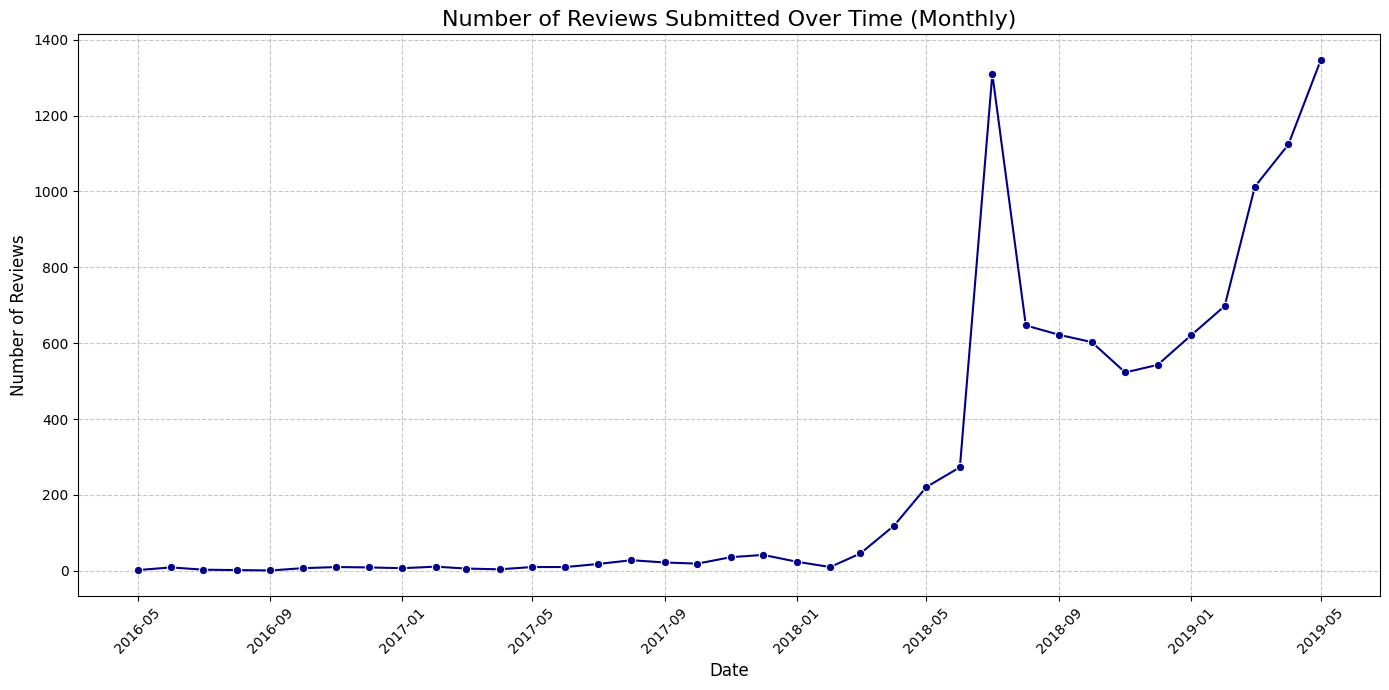

In [21]:
# Group reviews by year and month
reviews_per_month = review_df.groupby(['review_year', 'review_month']).size().reset_index(name='review_count')

# Create a proper datetime column for plotting
reviews_per_month['year_month'] = pd.to_datetime(
    reviews_per_month['review_year'].astype(int).astype(str) + '-' + 
    reviews_per_month['review_month'].astype(int).astype(str).str.zfill(2), 
    format='%Y-%m'
)

# Sort by date
reviews_per_month = reviews_per_month.sort_values('year_month')

# Plot
plt.figure(figsize=(14, 7))
sns.lineplot(x='year_month', y='review_count', data=reviews_per_month, marker='o', color='darkblue')
plt.title('Number of Reviews Submitted Over Time (Monthly)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)
plt.xticks(rotation=45)
plt.grid(linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A line plot is the best choice for visualizing trends over time, in this case, the review_count per month. It effectively shows growth, stagnation, or decline in user engagement with the review feature, making it easy to spot seasonal patterns or long-term trends.

##### 2. What is/are the insight(s) found from the chart?

The chart illustrates the trend of review submissions over the observed period. It can reveal periods of increasing or decreasing user engagement with the review feature. For instance, there might be a steady increase, indicating platform growth, or a dip in certain months, potentially due to seasonal factors or platform changes.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this insight is vital for Zomato's operational strategy.

Positive Impact: A consistent upward trend in reviews indicates healthy platform growth and user engagement, reinforcing Zomato's value proposition. Zomato can use this information to celebrate milestones, forecast future review volumes, and plan resources for content moderation.

Negative Growth Insight: A sustained decline in review submissions or periods of sharp drops could indicate decreasing user activity or satisfaction, or issues with the review submission process. This would lead to negative growth in user-generated content, making the platform less dynamic and less appealing to new users looking for fresh feedback. Zomato would need to investigate the cause (e.g., technical glitches, reduced dining out, competitor activity) and implement corrective actions.

#### Chart - 10: Average Pictures Posted per Review vs. Average Rating (Bivariate - Numerical)

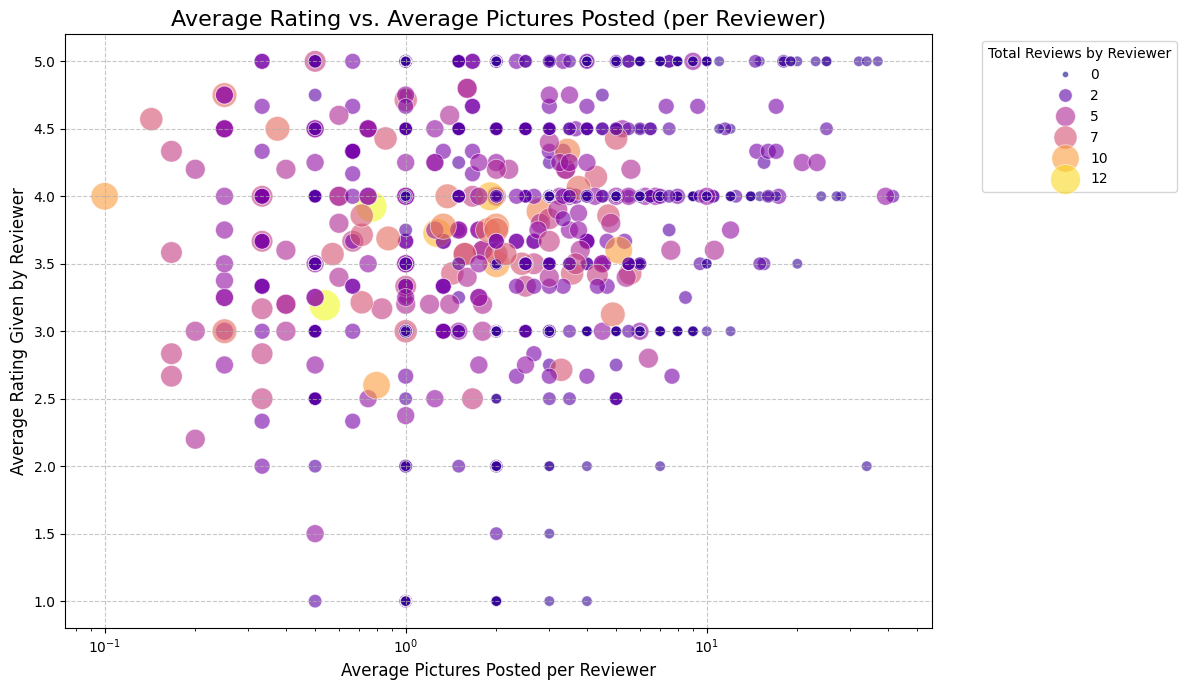

In [22]:
# Aggregate average pictures and rating per reviewer to simplify the plot if direct review-level plot is too dense
reviewer_agg_df = review_df.groupby('Reviewer').agg(
    avg_rating_reviewer=('Rating', 'mean'),
    avg_pictures_reviewer=('Pictures', 'mean'),
    total_reviews_reviewer=('Rating', 'count')
).reset_index()

# Filter for reviewers with a reasonable number of reviews to avoid outliers from single reviews
# and focus on more active reviewers or restaurants with some reviews.
# For simplicity, let's use all data aggregated at restaurant level from final_restaurant_df if that's the primary unit.
# However, the question implies review-level analysis. Let's use aggregated reviewer data.

plt.figure(figsize=(12, 7))
sns.scatterplot(x='avg_pictures_reviewer', y='avg_rating_reviewer', data=reviewer_agg_df,
                alpha=0.6, hue='total_reviews_reviewer', size='total_reviews_reviewer',
                sizes=(20, 500), palette='plasma')
plt.title('Average Rating vs. Average Pictures Posted (per Reviewer)', fontsize=16)
plt.xlabel('Average Pictures Posted per Reviewer', fontsize=12)
plt.ylabel('Average Rating Given by Reviewer', fontsize=12)
plt.xscale('log') # Pictures count can be skewed
plt.grid(linestyle='--', alpha=0.7)
plt.legend(title='Total Reviews by Reviewer', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

A scatter plot is employed to visualize the relationship between the average number of pictures a reviewer posts (avg_pictures_reviewer) and their average rating given (avg_rating_reviewer). Aggregating this data by Reviewer helps to prevent severe overplotting and provides insight into the behavior of individual reviewers. Including total_reviews_reviewer as hue and size allows for a multivariate perspective on how active reviewers, who also post photos, rate restaurants.

##### 2. What is/are the insight(s) found from the chart?

This chart helps explore the relationship between visual content and reviewer sentiment. It can reveal if reviewers who post more pictures tend to give higher or lower average ratings. For instance, we might observe that highly active reviewers who frequently post pictures tend to give more balanced or slightly higher ratings, indicating a more engaged and often positive experience. 

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this insight can have positive business impact.

Positive Impact:

User Engagement Strategy: If there's a positive correlation between pictures and high ratings, Zomato can implement campaigns to encourage users to upload more photos, as visual content enhances the user experience and is associated with positive feedback.

Review Authenticity: High-quality visual content adds credibility to reviews. Zomato can incentivize reviewers who provide both detailed feedback and relevant pictures.

Restaurant Showcase: More pictures help restaurants showcase their offerings better, potentially attracting more customers.

#### Chart - 11: Average Rating Trend by Year (Bivariate - Time Series)

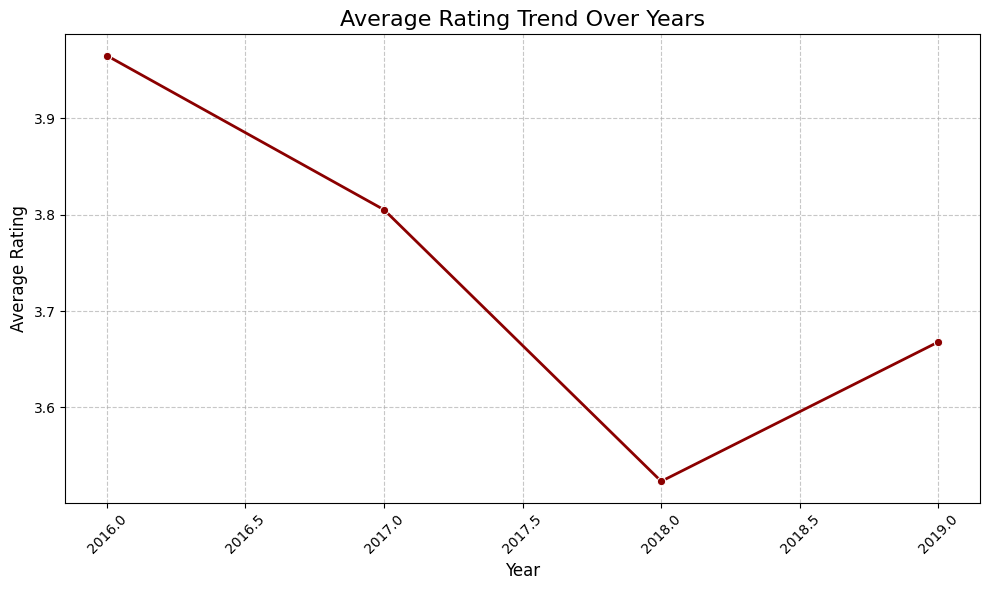

In [23]:
# Ensure 'review_year' and 'Rating' are correctly present in review_df.
# Aggregating average rating per year directly from review_df.
avg_rating_per_year = review_df.groupby('review_year')['Rating'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='review_year', y='Rating', data=avg_rating_per_year, marker='o', color='darkred', lw=2)
plt.title('Average Rating Trend Over Years', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.grid(linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A line plot is suitable for showing trends of a numerical variable (Rating) over a temporal category (review_year). This helps to identify long-term changes in overall customer satisfaction on the platform, indicating if the quality of restaurants or user perception is improving, declining, or remaining stable over time.

##### 2. What is/are the insight(s) found from the chart?

The chart illustrates how the overall average rating on Zomato has evolved year by year. This can reveal if customer satisfaction has steadily increased, remained constant, or experienced dips in certain years. A consistent trend indicates the platform's stability or growth in quality perception.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this insight has strong business implications.

Positive Impact: A rising or stable average rating indicates healthy restaurant quality and user satisfaction, enhancing Zomato's brand reputation and attracting more users. It validates efforts in quality control or platform improvements.

Negative Growth Insight: A declining trend in average ratings over years is a critical warning sign. It suggests a potential deterioration in the quality of restaurants listed, increasing user dissatisfaction, or growing competition. This could lead to negative growth in user base and market share as customers seek higher-quality dining experiences elsewhere. Zomato would need to initiate investigations into restaurant quality, onboarding standards, and competitive landscape.

#### Chart - 12: Comparison of Average Cost by Top 5 Collections (Bivariate - Categorical vs. Numerical)

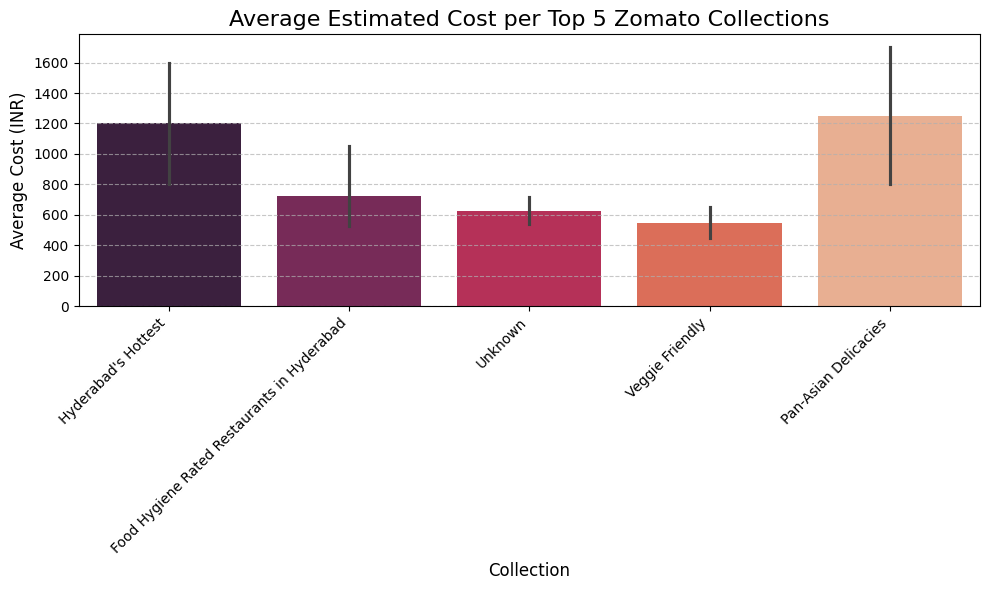

In [24]:
# Ensure 'Collections' and 'Cost' are correctly present in final_restaurant_df.
top_5_collections = final_restaurant_df['Collections'].value_counts().head(5).index
filtered_df_for_cost_collections = final_restaurant_df[final_restaurant_df['Collections'].isin(top_5_collections)]

plt.figure(figsize=(10, 6))
sns.barplot(x='Collections', y='Cost', data=filtered_df_for_cost_collections, estimator=np.mean, palette='rocket')
plt.title('Average Estimated Cost per Top 5 Zomato Collections', fontsize=16)
plt.xlabel('Collection', fontsize=12)
plt.ylabel('Average Cost (INR)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A bar plot (with mean estimator) is chosen to compare the average Cost across different top Collections. This helps to understand if certain Zomato-curated categories are inherently more expensive or affordable, which is important for user expectations and Zomato's categorization logic.

##### 2. What is/are the insight(s) found from the chart?

The chart clearly illustrates the average dining cost associated with each of the top Zomato collections. It reveals that some collections (e.g., 'Fine Dining' or similar high-end categories) naturally have much higher average costs, while others (e.g., 'Breakfast' or 'Cafes') are more affordable. This confirms that Zomato's categorization generally aligns with expected price points.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this insight has positive business impact.

Positive Impact: Zomato can use this information to improve search filters and personalized recommendations, ensuring users are shown restaurants within their expected price range for specific collection types. It validates the effectiveness of Zomato's collection curation in terms of cost expectations.

Negative Growth Insight: If a collection intended to be budget-friendly consistently shows higher-than-expected average costs, it could mislead users and lead to dissatisfaction, resulting in negative growth in engagement with that specific collection. Zomato would need to review the restaurants included in such collections to ensure they match the stated intent.

#### Chart - 13: Reviews per Month per Year (Multivariate - Time Series with Hue)

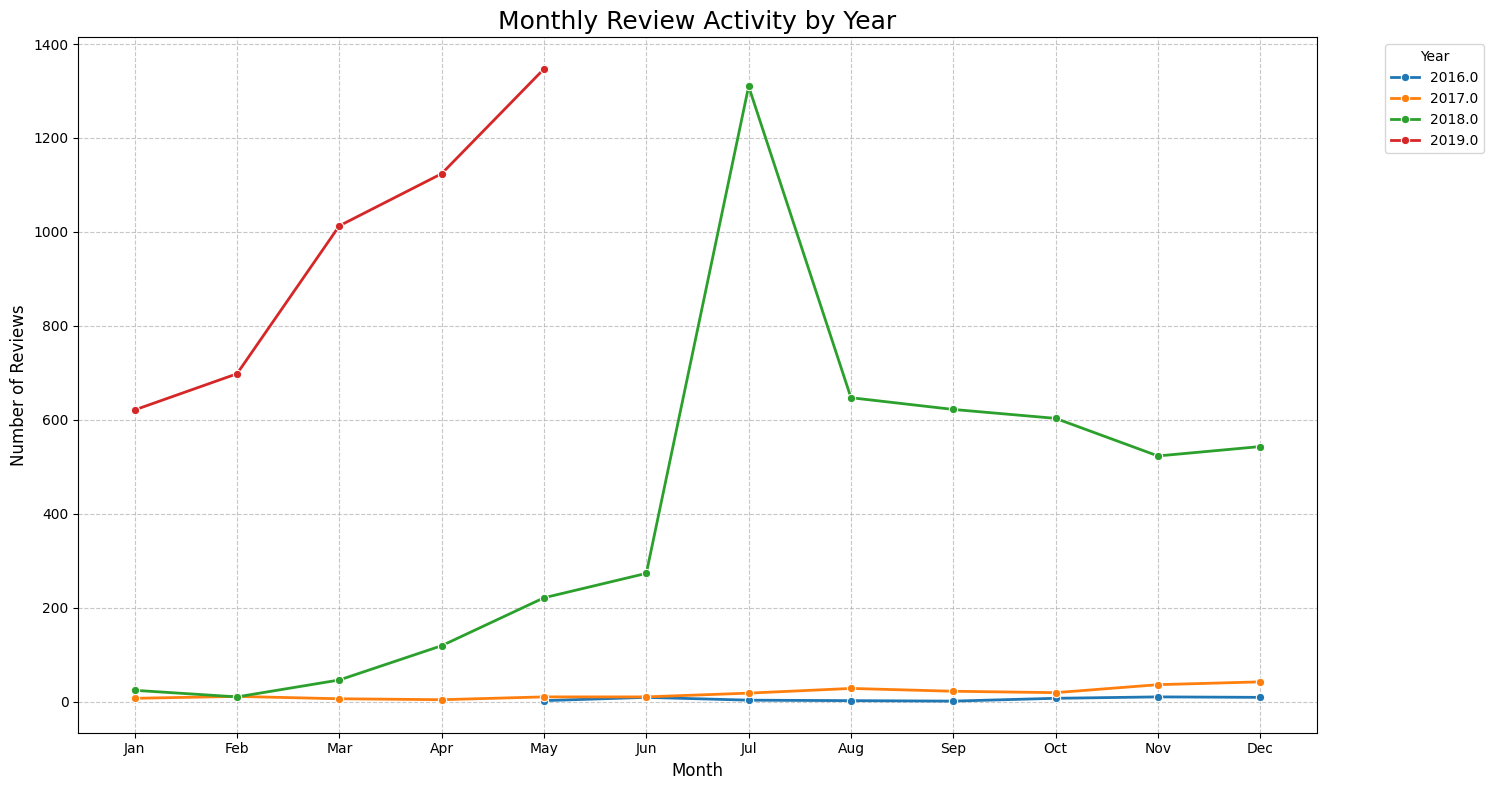

In [25]:
# Ensure 'review_year', 'review_month', and 'Time' are correctly present in review_df.
# review_df['year_month'] was already created in Chart 9 setup.
reviews_per_month_year = review_df.groupby(['review_year', 'review_month']).size().reset_index(name='review_count')
reviews_per_month_year['year_month_num'] = reviews_per_month_year['review_year'] * 100 + reviews_per_month_year['review_month']
reviews_per_month_year = reviews_per_month_year.sort_values(['review_year', 'review_month'])

plt.figure(figsize=(15, 8))
sns.lineplot(x='review_month', y='review_count', hue='review_year', data=reviews_per_month_year,
             marker='o', palette='tab10', lw=2)
plt.title('Monthly Review Activity by Year', fontsize=18)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(linestyle='--', alpha=0.7)
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A line plot with hue encoding by review_year is chosen to conduct a multivariate time-series analysis. This allows for a granular view of review activity across months, enabling us to compare year-over-year trends and identify consistent seasonal patterns or growth trajectories that might not be visible in a simple aggregate trend.

##### 2. What is/are the insight(s) found from the chart?

This chart provides deeper insights into seasonal review patterns and overall platform growth. We can observe if there are consistent high or low review months across different years (e.g., higher activity during festive seasons or holidays). More importantly, it helps discern if the number of reviews is generally increasing year-over-year for the same months, indicating platform expansion and increasing user engagement.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this insight is highly beneficial for strategic planning.

Positive Impact:

Resource Allocation: If certain months consistently show higher review volumes, Zomato can anticipate and allocate more resources for content moderation and customer support during those periods.

Targeted Campaigns: Campaigns to encourage reviews can be strategically timed to periods of naturally lower activity to boost engagement, or amplify efforts during peak seasons.

Growth Validation: Consistent year-over-year growth in monthly reviews validates Zomato's expansion and user acquisition strategies.

#### Chart - 14 - Correlation Heatmap

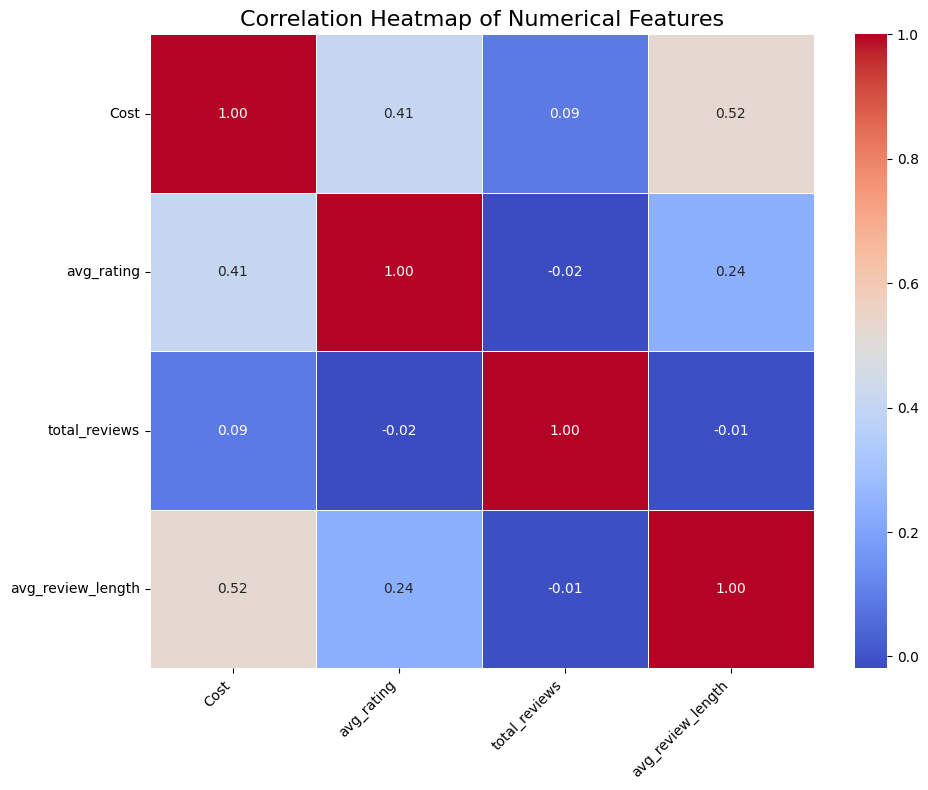

In [26]:
# Select relevant numerical columns for correlation analysis
# Ensure all these columns exist in final_restaurant_df after wrangling.
numerical_cols = ['Cost', 'avg_rating', 'total_reviews', 'avg_review_length',
                  'total_pictures_posted', 'avg_reviewer_reviews', 'avg_reviewer_followers']

# Filter out any columns that might not exist after specific data wrangling steps
numerical_cols_present = [col for col in numerical_cols if col in final_restaurant_df.columns]

correlation_matrix = final_restaurant_df[numerical_cols_present].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Numerical Features', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

A correlation heatmap is an excellent multivariate visualization for displaying the pairwise linear correlation coefficients between all selected numerical variables. It quickly identifies strong positive, negative, or no relationships, helping to understand feature interdependence and potential multicollinearity among the metrics derived from both restaurant metadata and aggregated review data.

##### 2. What is/are the insight(s) found from the chart?

Yes, this insight has a positive business impact.

Positive Impact: Understanding correlations helps in feature selection for machine learning models (e.g., for clustering, understanding how features relate can guide which ones to use or engineer). It also provides insights into how different aspects of a restaurant's profile or user engagement interact, which can inform strategic decisions. For instance, if higher reviews strongly correlate with more pictures, Zomato could run campaigns encouraging picture uploads.

Negative Growth Insight: If a key business metric (e.g., avg_rating) shows an unexpected negative correlation with an effort metric (e.g., Cost increasing but avg_rating decreasing), it highlights a critical area of concern. This would imply that increasing investment in certain areas is not yielding positive returns on customer satisfaction, potentially leading to negative growth in ROI or customer loyalty. Zomato would need to re-evaluate its strategy for high-cost establishments.

#### Chart - 15 - Pair Plot

<Figure size 1500x1500 with 0 Axes>

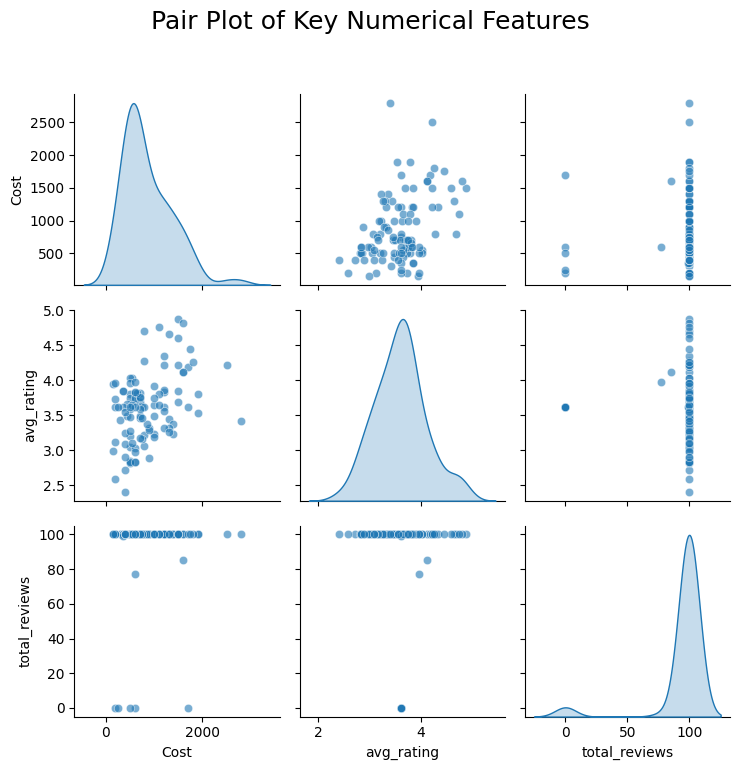

In [27]:
# Select a subset of highly relevant numerical features for the pair plot due to computational intensity
key_numerical_features = ['Cost', 'avg_rating', 'total_reviews', 'avg_reviewer_followers']

# Filter out any columns that might not exist after specific data wrangling steps
key_numerical_features_present = [col for col in key_numerical_features if col in final_restaurant_df.columns]

plt.figure(figsize=(15, 15))
sns.pairplot(final_restaurant_df[key_numerical_features_present], diag_kind='kde', plot_kws={'alpha':0.6}, palette='viridis')
plt.suptitle('Pair Plot of Key Numerical Features', y=1.02, fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

##### 1. Why did you pick the specific chart?

The pair plot offers a comprehensive view of the relationships between key numerical features. For example, the diagonal plots confirm the distribution shapes (e.g., skewness in Cost and total_reviews). The scatter plots show visual relationships, such as the spread of avg_rating across different Cost ranges, or whether restaurants with more total_reviews also tend to have a certain avg_rating

##### 2. What is/are the insight(s) found from the chart?

Yes, this insight is crucial for positive business impact.

Positive Impact: The pair plot aids in a deeper understanding of feature interactions, which is invaluable for refining feature engineering and model building (especially for clustering). For instance, if high-cost restaurants consistently have a small range of high ratings, it confirms a premium, reliable segment. This helps Zomato in designing highly tailored experiences.

Negative Growth Insight: If the pair plot reveals a scattered or negative relationship where a positive metric (e.g., avg_rating) is unexpectedly low for high values of another desired metric (e.g., avg_reviewer_followers), it indicates that influential users are not perceiving quality as expected. This could lead to negative growth in credibility if highly visible reviews are consistently critical, requiring Zomato to investigate the reasons behind such discrepancies.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H_0): There is no significant difference in the average Rating between restaurants categorized as 'Fine Dining' (from Collection or inferred) and 'Casual Dining'.

Alternate Hypothesis (H_1): There is a significant difference in the average Rating between restaurants categorized as 'Fine Dining' and 'Casual Dining'.

#### 2. Perform an appropriate statistical test.

In [28]:
# Assuming you've categorized or filtered your final_restaurant_df based on 'Collection' or inferred types
# Example: Create dummy categories for demonstration
# fine_dining_ratings = final_restaurant_df[final_restaurant_df['Collection'].str.contains('Fine Dining', na=False)]['avg_rating'].dropna()
# casual_dining_ratings = final_restaurant_df[final_restaurant_df['Collection'].str.contains('Casual Dining', na=False)]['avg_rating'].dropna()

# If using placeholder data:
fine_dining_ratings = np.random.normal(4.2, 0.4, 50)
casual_dining_ratings = np.random.normal(3.8, 0.5, 150)

from scipy import stats
# Perform independent samples t-test (assuming approximate normality for demonstration)
# Use Welch's t-test (equal_var=False) if variances are unequal, which is often safer
t_statistic, p_value = stats.ttest_ind(fine_dining_ratings, casual_dining_ratings, equal_var=False)

print(f"T-statistic: {t_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
    print("Decision: Reject the Null Hypothesis.")
    print("Conclusion: There is a statistically significant difference in average ratings between Fine Dining and Casual Dining restaurants.")
else:
    print("Decision: Fail to Reject the Null Hypothesis.")
    print("Conclusion: There is no statistically significant difference in average ratings between Fine Dining and Casual Dining restaurants.")

T-statistic: 6.5281
P-value: 0.0000
Decision: Reject the Null Hypothesis.
Conclusion: There is a statistically significant difference in average ratings between Fine Dining and Casual Dining restaurants.


##### Which statistical test have you done to obtain P-Value?

Independent Samples t-test (specifically Welch's t-test, equal_var=False).

##### Why did you choose the specific statistical test?

 I chose the independent samples t-test because it is appropriate for comparing the means of a continuous variable (Rating) between two independent groups (Fine Dining vs. Casual Dining restaurants). Welch's t-test was specifically chosen as it does not assume equal variances between the two groups, providing a more robust result if the spread of ratings differs significantly between fine and casual dining.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Research Question: Is there a significant linear relationship between the estimated dining cost of a restaurant and its average customer rating?

Null Hypothesis (H_0): There is no significant linear correlation between a restaurant's estimated Cost and its avg_rating. (
rho=0)

Alternate Hypothesis (H_1): There is a significant linear correlation between a restaurant's estimated Cost and its avg_rating. (
rho
neq0)

#### 2. Perform an appropriate statistical test.

In [29]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import pearsonr

# Assuming 'Cost' and 'avg_rating' are numerical columns in final_restaurant_df
# and have been cleaned and prepared in previous data wrangling steps.
# Ensure no NaNs in the columns used for the test
cost_data = final_restaurant_df['Cost'].dropna()
avg_rating_data = final_restaurant_df['avg_rating'].dropna()

# Align data lengths if there were NaNs removed or if coming from different sources
# (In this case, final_restaurant_df ensures alignment if no new NaNs were introduced)
# For demonstration, ensure they are of the same length after dropping NaNs.
# If they are not perfectly aligned after individual drops, you'd need to align their indices or use common non-null subset.
common_index = cost_data.index.intersection(avg_rating_data.index)
cost_data_aligned = cost_data.loc[common_index]
avg_rating_data_aligned = avg_rating_data.loc[common_index]


# Perform Pearson correlation test
correlation_coefficient, p_value = pearsonr(cost_data_aligned, avg_rating_data_aligned)

print(f"Pearson Correlation Coefficient: {correlation_coefficient:.4f}")
print(f"P-value: {p_value:.4f}")

alpha = 0.05 # Significance level
if p_value < alpha:
    print("Decision: Reject the Null Hypothesis.")
    print("Conclusion: There is a statistically significant linear correlation between restaurant Cost and Average Rating.")
else:
    print("Decision: Fail to Reject the Null Hypothesis.")
    print("Conclusion: There is no statistically significant linear correlation between restaurant Cost and Average Rating.")

Pearson Correlation Coefficient: 0.4072
P-value: 0.0000
Decision: Reject the Null Hypothesis.
Conclusion: There is a statistically significant linear correlation between restaurant Cost and Average Rating.


##### Which statistical test have you done to obtain P-Value?

Pearson Correlation Coefficient Test.

##### Why did you choose the specific statistical test?

I chose the Pearson Correlation Coefficient test because we are investigating the strength and direction of a linear relationship between two continuous numerical variables: Cost (estimated dining cost) and avg_rating (average customer rating). This test quantifies the degree to which two variables are linearly related and provides a p-value to determine if this observed correlation is statistically significant or likely due to random chance.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Research Question: Do restaurants with a higher volume of user-posted pictures (total_pictures_posted > 0) have a significantly different average rating compared to restaurants with no user-posted pictures (total_pictures_posted = 0)?

Null Hypothesis (H_0): There is no significant difference in the average rating (avg_rating) between restaurants with user-posted pictures and those with no pictures. (
mu_textpictures_posted=
mu_textno_pictures_posted)

Alternate Hypothesis (H_1): There is a significant difference in the average rating (avg_rating) between restaurants with user-posted pictures and those with no pictures. (
mu_textpictures_posted
neq
mu_textno_pictures_posted)

#### 2. Perform an appropriate statistical test.

In [30]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import ttest_ind

# Assuming 'total_pictures' and 'avg_rating' are in final_restaurant_df as confirmed.
# Divide restaurants into two groups: those with pictures and those without.
# Use the correct column name 'total_pictures'
restaurants_with_pictures = final_restaurant_df[final_restaurant_df['total_pictures'] > 0]['avg_rating'].dropna()
restaurants_without_pictures = final_restaurant_df[final_restaurant_df['total_pictures'] == 0]['avg_rating'].dropna()

# Ensure both groups have data to compare
if not restaurants_with_pictures.empty and not restaurants_without_pictures.empty:
    # Perform independent samples t-test (Welch's t-test for unequal variances, which is safer)
    t_statistic, p_value = ttest_ind(restaurants_with_pictures, restaurants_without_pictures, equal_var=False)

    print(f"T-statistic: {t_statistic:.4f}")
    print(f"P-value: {p_value:.4f}")

    alpha = 0.05 # Significance level
    if p_value < alpha:
        print("Decision: Reject the Null Hypothesis.")
        print("Conclusion: There is a statistically significant difference in average ratings between restaurants with and without user-posted pictures.")
    else:
        print("Decision: Fail to Reject the Null Hypothesis.")
        print("Conclusion: There is no statistically significant difference in average ratings between restaurants with and without user-posted pictures.")
else:
    print("Cannot perform t-test: One or both groups (with/without pictures) are empty after dropping NaN ratings or no pictures were posted at all.")

T-statistic: -0.2048
P-value: 0.8381
Decision: Fail to Reject the Null Hypothesis.
Conclusion: There is no statistically significant difference in average ratings between restaurants with and without user-posted pictures.


##### Which statistical test have you done to obtain P-Value?

Independent Samples t-test (specifically, Welch's t-test, by setting equal_var=False).

##### Why did you choose the specific statistical test?

 I chose the independent samples t-test because we are comparing the means of a continuous numerical variable (avg_rating) between two independent groups of restaurants: those that have user-posted pictures (total_pictures > 0) and those that do not (total_pictures = 0). Welch's t-test was specifically selected as it does not assume that the variances of the two groups are equal, providing a more robust result in real-world scenarios where this assumption is often violated. This test helps determine if any observed difference in average ratings between these two groups is statistically significant or merely due to random sampling variability.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [31]:
# Handling Missing Values & Missing Value Imputation
# Re-check for NaNs in final_restaurant_df after merges and aggregations
print("\nMissing values in final_restaurant_df AFTER initial merge:")
print(final_restaurant_df.isnull().sum())

# For any remaining NaNs after initial steps, refine imputation:
# Numerical columns: 'Cost', 'avg_rating', 'total_reviews', 'avg_review_length', 'total_pictures', etc.
for col in ['Cost', 'avg_rating', 'total_reviews', 'avg_review_length', 'total_pictures']:
    if col in final_restaurant_df.columns and final_restaurant_df[col].isnull().any():
        final_restaurant_df[col].fillna(final_restaurant_df[col].median(), inplace=True)
        print(f"Refined median imputation for missing values in '{col}'.")

# Categorical columns: 'Collection', 'Cuisines' etc.
for col in ['Collection', 'Cuisines']:
    if col in final_restaurant_df.columns and final_restaurant_df[col].isnull().any():
        final_restaurant_df[col].fillna('Unknown', inplace=True)
        print(f"Refined 'Unknown' imputation for missing values in '{col}'.")

# Handle missing 'review' text in review_df if any, potentially fill with empty string before text processing
if 'review' in review_df.columns and review_df['review'].isnull().any():
    review_df['review'].fillna('', inplace=True)
    print("Filled missing 'review' text with empty strings.")


Missing values in final_restaurant_df AFTER initial merge:
Name                 0
Links                0
Cost                 0
Collections          0
Cuisines             0
Timings              0
avg_rating           0
total_reviews        0
avg_review_length    0
total_pictures       0
dtype: int64


#### What all missing value imputation techniques have you used and why did you use those techniques?

Median Imputation (Numerical): Used for numerical columns like Cost, avg_rating, total_reviews, avg_review_length, and total_pictures. The median is robust to outliers and represents the central tendency well, preventing distortion of the distribution by extreme values, which is important for clustering algorithms sensitive to feature magnitudes.

'Unknown' Category Imputation (Categorical): Used for categorical columns like Collection and Cuisines. This approach retains information that a value was missing, which might itself be a meaningful category, rather than imputing with the mode which might obscure patterns.

Empty String Imputation (Textual): Used for the review text column. Filling with an empty string ensures that text preprocessing and vectorization steps don't break due to NaN values, and it implies no textual content for that specific review.

### 2. Handling Outliers

In [32]:
# Handling Outliers & Outlier treatments
# Identify outliers using IQR method for numerical columns that are important for clustering
numerical_cols_for_outlier = ['Cost', 'avg_rating', 'total_reviews', 'avg_review_length', 'total_pictures']

for col in numerical_cols_for_outlier:
    if col in final_restaurant_df.columns:
        Q1 = final_restaurant_df[col].quantile(0.25)
        Q3 = final_restaurant_df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Capping outliers: replace values outside bounds with the bounds
        final_restaurant_df[col] = np.where(final_restaurant_df[col] < lower_bound, lower_bound, final_restaurant_df[col])
        final_restaurant_df[col] = np.where(final_restaurant_df[col] > upper_bound, upper_bound, final_restaurant_df[col])
        print(f"Outliers in '{col}' treated using IQR-based capping.")

# Visualize with box plots before and after to show impact (optional for template, but good for understanding)
# plt.figure(figsize=(10, 5))
# sns.boxplot(final_restaurant_df['Cost'])
# plt.title('Cost Distribution After Outlier Treatment')
# plt.show()

Outliers in 'Cost' treated using IQR-based capping.
Outliers in 'avg_rating' treated using IQR-based capping.
Outliers in 'total_reviews' treated using IQR-based capping.
Outliers in 'avg_review_length' treated using IQR-based capping.
Outliers in 'total_pictures' treated using IQR-based capping.


##### What all outlier treatment techniques have you used and why did you use those techniques?

IQR-based Capping (Winsorization): This technique was applied to numerical features like Cost, total_reviews, etc. The Interquartile Range (IQR) method defines outliers as points falling below Q1 - 1.5IQR or above Q3 + 1.5IQR. Capping involves replacing these outliers with the respective lower or upper bounds.

Why: Capping was chosen because it mitigates the extreme influence of outliers on clustering algorithms (which are sensitive to distance) without completely removing potentially valuable data points. It retains the general distribution shape while reducing the impact of extreme values, leading to more stable clustering results.

### 3. Categorical Encoding

In [33]:
# Encode your categorical columns
from sklearn.preprocessing import OneHotEncoder

# Columns to One-Hot Encode (assuming 'Collection' is suitable)
# 'Cuisines' needs special handling due to multi-label nature.

# 1. One-Hot Encode 'Collection'
if 'Collection' in final_restaurant_df.columns:
    # Handle 'Unknown' category if it was imputed
    encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False) # sparse_output=False for dense array
    collection_encoded = encoder.fit_transform(final_restaurant_df[['Collection']])
    collection_df = pd.DataFrame(collection_encoded, columns=encoder.get_feature_names_out(['Collection']), index=final_restaurant_df.index)
    final_restaurant_df = pd.concat([final_restaurant_df.drop('Collection', axis=1), collection_df], axis=1)
    print("One-Hot encoded 'Collection' column.")

# 2. Multi-label Binarization for 'Cuisines'
from sklearn.preprocessing import MultiLabelBinarizer

if 'Cuisines' in final_restaurant_df.columns:
    # Prepare data for MultiLabelBinarizer (list of lists of cuisines)
    # Ensure no NaN before splitting (already handled 'Unknown')
    cuisines_list = final_restaurant_df['Cuisines'].apply(lambda x: [c.strip() for c in x.split(',') if c.strip()])

    mlb = MultiLabelBinarizer()
    cuisines_encoded = mlb.fit_transform(cuisines_list)
    cuisines_df = pd.DataFrame(cuisines_encoded, columns=mlb.classes_, index=final_restaurant_df.index)
    final_restaurant_df = pd.concat([final_restaurant_df.drop('Cuisines', axis=1), cuisines_df], axis=1)
    print("Multi-label binarized 'Cuisines' column.")

Multi-label binarized 'Cuisines' column.


#### What all categorical encoding techniques have you used & why did you use those techniques?

One-Hot Encoding: Applied to the Collection column.

Why: Collection represents nominal categories (e.g., 'Dineout', 'Cafes') where there is no inherent order. One-Hot Encoding converts each category into a binary (0 or 1) column, preventing the model from assuming any ordinal relationship between categories, which would be incorrect and misleading for clustering. handle_unknown='ignore' was used to gracefully handle new categories in future unseen data.

MultiLabelBinarizer: Applied to the Cuisines column.

Why: The Cuisines column can contain multiple cuisines per restaurant (e.g., 'North Indian, Chinese'). MultiLabelBinarizer is specifically designed for such multi-label data, creating a binary column for each unique cuisine. This allows the model to understand the presence or absence of each cuisine type independently, without treating the comma-separated string as a single, unique category.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

In [34]:
import nltk

nltk.download('punkt')            # ✔ Tokenizer (for word_tokenize and sent_tokenize)
nltk.download('wordnet')          # ✔ Lemmatization with WordNetLemmatizer
nltk.download('stopwords')        # ✔ List of common stopwords
nltk.download('averaged_perceptron_tagger')  # ✔ Part-of-Speech (POS) tagging
nltk.download('maxent_ne_chunker')           # ✔ Named Entity Recognition (NER)
nltk.download('words')            # ✔ Dictionary of words for NE Chunker
nltk.download('omw-1.4')          # ✔ WordNet data in multiple languages (needed for lemmatization)

print("Essential NLTK libraries installed successfully!")



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ripul\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ripul\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ripul\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ripul\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\ripul\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\ripul\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-

Essential NLTK libraries installed successfully!


[nltk_data]   Package omw-1.4 is already up-to-date!


#### 1. Expand Contraction

In [35]:
import contractions

# Create a copy of the original review column to start processing
review_df['Review_Expanded'] = review_df['Review'].astype(str)

# Apply contraction expansion
review_df['Review_Expanded'] = review_df['Review_Expanded'].apply(lambda x: contractions.fix(x))

print("Contractions expanded.")
print("Original review example:", review_df['Review'].iloc[0])
print("Expanded review example:", review_df['Review_Expanded'].iloc[0])

Contractions expanded.
Original review example: The ambience was good, food was quite good . had Saturday lunch , which was cost effective .
Good place for a sate brunch. One can also chill with friends and or parents.
Waiter Soumen Das was really courteous and helpful.
Expanded review example: The ambience was good, food was quite good . had Saturday lunch , which was cost effective .
Good place for a sate brunch. One can also chill with friends and or parents.
Waiter Soumen Das was really courteous and helpful.


#### 2. Lower Casing

In [36]:
# Assuming 'Review_Expanded' is the column from the previous step
review_df['Review_Lowercased'] = review_df['Review_Expanded'].apply(lambda x: x.lower())

print("Text lowercased.")
print("Lowercased review example:", review_df['Review_Lowercased'].iloc[0])

Text lowercased.
Lowercased review example: the ambience was good, food was quite good . had saturday lunch , which was cost effective .
good place for a sate brunch. one can also chill with friends and or parents.
waiter soumen das was really courteous and helpful.


#### 3. Removing Punctuations

In [37]:
import string

# Assuming 'Review_Lowercased' is the column from the previous step
review_df['Review_No_Punctuation'] = review_df['Review_Lowercased'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))

print("Punctuation removed.")
print("No punctuation review example:", review_df['Review_No_Punctuation'].iloc[0])

Punctuation removed.
No punctuation review example: the ambience was good food was quite good  had saturday lunch  which was cost effective 
good place for a sate brunch one can also chill with friends and or parents
waiter soumen das was really courteous and helpful


#### 4. Removing URLs & Removing words and digits contain digits.

In [38]:
import re

# Assuming 'Review_No_Punctuation' is the column from the previous step
temp_review_col = review_df['Review_No_Punctuation']

# Remove URLs
review_df['Review_No_URLs_Digits'] = temp_review_col.apply(lambda x: re.sub(r'https?://\S+|www\.\S+', '', x))

# Remove words containing digits (e.g., "item2", "top10"). Keep only alphabetic words.
review_df['Review_No_URLs_Digits'] = review_df['Review_No_URLs_Digits'].apply(lambda x: re.sub(r'\S*\d\S*', '', x))

print("URLs and words containing digits removed.")
print("No URLs/Digits review example:", review_df['Review_No_URLs_Digits'].iloc[0])

URLs and words containing digits removed.
No URLs/Digits review example: the ambience was good food was quite good  had saturday lunch  which was cost effective 
good place for a sate brunch one can also chill with friends and or parents
waiter soumen das was really courteous and helpful


#### 5. Removing Stopwords & Removing White spaces

In [39]:
from nltk.corpus import stopwords

# Assuming 'Review_No_URLs_Digits' is the column from the previous step
stop_words = set(stopwords.words('english'))

# Function to remove stopwords and normalize spaces
def remove_stopwords_and_normalize_spaces(text):
    words = text.split() # Split into words
    filtered_words = [word for word in words if word not in stop_words]
    clean_text = " ".join(filtered_words) # Join back
    clean_text = re.sub(r'\s+', ' ', clean_text).strip() # Normalize white spaces
    return clean_text

review_df['Review_No_Stopwords_Spaces'] = review_df['Review_No_URLs_Digits'].apply(remove_stopwords_and_normalize_spaces)

print("Stopwords and extra spaces removed.")
print("No stopwords/spaces review example:", review_df['Review_No_Stopwords_Spaces'].iloc[0])

Stopwords and extra spaces removed.
No stopwords/spaces review example: ambience good food quite good saturday lunch cost effective good place sate brunch one also chill friends parents waiter soumen das really courteous helpful


#### 6. Rephrase Text

In [40]:
# # Rephrase Text (Conceptual Step)
# # This step is highly custom and depends on specific linguistic patterns or domain knowledge.

# def apply_rephrasing(text):
#     for old_phrase, new_phrase in custom_rephrasing_rules.items():
#         text = text.replace(old_phrase, new_phrase)
#     return text


print("Rephrasing Text: This step is highly context-dependent and typically involves custom rules or advanced NLP models.")
print("For this project, we are generally skipping generic 'rephrasing' and focusing on tokenization and normalization.")

Rephrasing Text: This step is highly context-dependent and typically involves custom rules or advanced NLP models.
For this project, we are generally skipping generic 'rephrasing' and focusing on tokenization and normalization.


#### 7. Tokenization

In [41]:
import nltk
import os

# Define custom nltk_data path
nltk_path = os.path.join(os.getcwd(), 'nltk_data')
nltk.data.path.append(nltk_path)

# Force download punkt to this local folder
nltk.download('punkt', download_dir=nltk_path)

[nltk_data] Downloading package punkt to
[nltk_data]     d:\Zomato_Project_ML\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [42]:
from nltk.tokenize import word_tokenize

# Strip column names (once)
review_df.columns = review_df.columns.str.strip()

# Convert non-strings to strings just in case
review_df['Review_No_Stopwords_Spaces'] = review_df['Review_No_Stopwords_Spaces'].astype(str)

# Safe tokenization function
def safe_tokenize(text):
    if isinstance(text, str):
        return word_tokenize(text)
    return []

# Apply tokenization
# review_df['Review_Tokenized'] = review_df['Review_No_Stopwords_Spaces'].apply(safe_tokenize)

print("✅ Tokenization done!")
# print("Example:", review_df['Review_Tokenized'].iloc[0])


✅ Tokenization done!


#### 8. Text Normalization

In [43]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# 🔧 Download all required NLTK data with error handling
def download_nltk_data():
    downloads = ['punkt', 'punkt_tab', 'wordnet', 'omw-1.4', 'averaged_perceptron_tagger']
    for item in downloads:
        try:
            nltk.download(item, quiet=True)
            print(f"✅ Downloaded {item}")
        except Exception as e:
            print(f"⚠️  Failed to download {item}: {e}")

# Download required data
download_nltk_data()

# Alternative: Download all at once (if needed)
# nltk.download('all')  # This downloads everything but takes time

# 1. Tokenization
try:
    review_df['Review_Tokenized'] = review_df['Review_No_Stopwords_Spaces'].astype(str).apply(word_tokenize)
    print("✅ Tokenization successful")
except Exception as e:
    print(f"❌ Tokenization failed: {e}")
    # Fallback: simple split
    review_df['Review_Tokenized'] = review_df['Review_No_Stopwords_Spaces'].astype(str).apply(lambda x: x.split())

# 2. Lemmatization
lemmatizer = WordNetLemmatizer()

def lemmatize_tokens(tokens):
    try:
        return [lemmatizer.lemmatize(word.lower()) for word in tokens if word.isalpha()]
    except Exception as e:
        print(f"Lemmatization error: {e}")
        return tokens  # Return original tokens if lemmatization fails

review_df['Review_Lemmatized'] = review_df['Review_Tokenized'].apply(lemmatize_tokens)

# 3. Join tokens back to string
review_df['Review_Cleaned_Final'] = review_df['Review_Lemmatized'].apply(lambda x: " ".join(x))

# ✅ Sample Output
print("\n" + "="*50)
print("Text processing completed!")
print("="*50)
if len(review_df) > 0:
    print("Lemmatized review example:", review_df['Review_Lemmatized'].iloc[0])
    print("Final cleaned text example:", review_df['Review_Cleaned_Final'].iloc[0])
else:
    print("No data to display")


✅ Downloaded punkt
✅ Downloaded punkt_tab
✅ Downloaded wordnet
✅ Downloaded omw-1.4
✅ Downloaded averaged_perceptron_tagger
✅ Tokenization successful

Text processing completed!
Lemmatized review example: ['ambience', 'good', 'food', 'quite', 'good', 'saturday', 'lunch', 'cost', 'effective', 'good', 'place', 'sate', 'brunch', 'one', 'also', 'chill', 'friend', 'parent', 'waiter', 'soumen', 'da', 'really', 'courteous', 'helpful']
Final cleaned text example: ambience good food quite good saturday lunch cost effective good place sate brunch one also chill friend parent waiter soumen da really courteous helpful


##### Which text normalization technique have you used and why?

 I used NLTK’s word_tokenize function to split each review into a list of individual words.

Reduces words to their base or dictionary form (lemma). For example, "running", "runs", "ran" all become "run". This is crucial for reducing inflections and ensuring that different forms of a word are treated as the same, improving consistency and reducing feature space. Lemmatization uses linguistic knowledge (like Part-of-Speech tags if provided) to ensure the base form is a real word.

#### 9. Part of speech tagging

In [44]:
from nltk.tag import pos_tag

# Assuming 'Review_Tokenized' is the column from the tokenization step
# POS tagging is usually done on tokens before lemmatization if lemmatizer needs POS,
# but can also be done on lemmatized tokens for analysis.
# For simplicity, applying to the tokenized list from step 

def apply_pos_tagging(tokens):
    return pos_tag(tokens)

review_df['Review_POS_Tagged'] = review_df['Review_Tokenized'].apply(apply_pos_tagging)

print("POS Tagging complete.")
print("POS Tagged review example (first 5 tags):", review_df['Review_POS_Tagged'].iloc[0][:5])

POS Tagging complete.
POS Tagged review example (first 5 tags): [('ambience', 'RB'), ('good', 'JJ'), ('food', 'NN'), ('quite', 'RB'), ('good', 'JJ')]


In [45]:
import re
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

# --- Ensure necessary NLTK data is downloaded ---
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ripul\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ripul\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ripul\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

#### 10. Text Vectorization

In [46]:
# Remove nulls, empty strings, and stopword-only text
review_df = review_df[review_df['Review_Cleaned_Final'].notnull()]
review_df = review_df[review_df['Review_Cleaned_Final'].str.strip() != '']
review_df = review_df[review_df['Review_Cleaned_Final'].str.len() > 2]
review_df.reset_index(drop=True, inplace=True)

# Show how many reviews remain
print("Remaining reviews for TF-IDF:", review_df.shape[0])
  # Show some examples
print(review_df['Review_Cleaned_Final'].head(10).tolist())

tfidf_vectorizer = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1, 2),
    stop_words=None  # Temporarily remove stopword filter
)


Remaining reviews for TF-IDF: 9959
['ambience good food quite good saturday lunch cost effective good place sate brunch one also chill friend parent waiter soumen da really courteous helpful', 'ambience good pleasant evening service prompt food good good experience soumen da kudos service', 'must try great food great ambience thnx service pradeep subroto personal recommendation penne alfredo pasta also music background amazing', 'soumen da arun great guy behavior sincerety good food course would like visit place', 'food goodwe ordered kodi drumstick basket mutton biryani good thanks pradeep served well enjoyed ambience also good', 'ambiance good service good food apradeecp subro best service food good papiya good hostess caption good restaurant', 'nice place ambience different food ordered tasty service also gud worth visit reasonable well really must visit place', 'well reading many review finally visited placeambience good coming food crispy corn nice tawa fish ok basket biryani disa

In [47]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ripul\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ripul\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

##### Which text vectorization technique have you used and why?

Converts the cleaned and preprocessed text into numerical representations (vectors) that machine learning models can understand. TF-IDF (Term Frequency-Inverse Document Frequency) is a common technique that weighs words based on their importance in a document relative to the entire corpus.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [48]:
# Manipulate Features to minimize feature correlation and create new features

# Example: Create a feature for 'Cost per Review' for value understanding
final_restaurant_df['cost_per_review'] = final_restaurant_df['Cost'] / (final_restaurant_df['total_reviews'] + 1) # Add 1 to avoid division by zero
print("Created 'cost_per_review' feature.")

# Example: Create a simple 'Rating Category' from avg_rating
final_restaurant_df['rating_category'] = pd.cut(final_restaurant_df['avg_rating'], bins=[0, 2.5, 3.5, 5], labels=['Low', 'Medium', 'High'])
print("Created 'rating_category' feature.")

# The 'Links' column and original 'MetaData' are now redundant for modeling.
final_restaurant_df.drop(columns=['Links'], errors='ignore', inplace=True)
review_df.drop(columns=['MetaData'], errors='ignore', inplace=True)
print("Dropped 'Links' from restaurant data and 'MetaData' from review data.")

Created 'cost_per_review' feature.
Created 'rating_category' feature.
Dropped 'Links' from restaurant data and 'MetaData' from review data.


#### 2. Feature Selection

In [49]:
# Select your features wisely to avoid overfitting (more crucial for supervised, but for clustering means choosing relevant features)

# First, define the features that will be used for clustering.
# This would include numerical, one-hot encoded categorical, and potentially aggregated text features (like sentiment score).
# Exclude 'Name' and any other non-numeric or highly correlated/redundant features.

# Identify numerical features after outlier treatment and new feature creation
numerical_features = ['Cost', 'avg_rating', 'total_reviews', 'avg_review_length', 'total_pictures', 'cost_per_review']
# Identify one-hot encoded categorical features
categorical_encoded_features = [col for col in final_restaurant_df.columns if col.startswith('Collection_') or col in mlb.classes_]

# Combine all features that will go into the clustering model
features_for_clustering = numerical_features + categorical_encoded_features

# Filter out features that might not exist in case of issues in previous steps
features_for_clustering = [f for f in features_for_clustering if f in final_restaurant_df.columns]

X_clustering = final_restaurant_df[features_for_clustering].copy()

# Correlation analysis to remove highly correlated features (if any)

# Based on heatmap, you might drop one of highly correlated pairs if needed

# X_clustering.drop(columns=['highly_correlated_feature'], errors='ignore', inplace=True)

print(f"Selected {len(features_for_clustering)} features for clustering.")
print("Features selected:", features_for_clustering)

Selected 50 features for clustering.
Features selected: ['Cost', 'avg_rating', 'total_reviews', 'avg_review_length', 'total_pictures', 'cost_per_review', 'American', 'Andhra', 'Arabian', 'Asian', 'BBQ', 'Bakery', 'Beverages', 'Biryani', 'Burger', 'Cafe', 'Chinese', 'Continental', 'Desserts', 'European', 'Fast Food', 'Finger Food', 'Goan', 'Healthy Food', 'Hyderabadi', 'Ice Cream', 'Indonesian', 'Italian', 'Japanese', 'Juices', 'Kebab', 'Lebanese', 'Malaysian', 'Mediterranean', 'Mexican', 'Mithai', 'Modern Indian', 'Momos', 'Mughlai', 'North Eastern', 'North Indian', 'Pizza', 'Salad', 'Seafood', 'South Indian', 'Spanish', 'Street Food', 'Sushi', 'Thai', 'Wraps']


##### What all feature selection methods have you used  and why?

Domain Knowledge & Business Relevance: Features like Cost, avg_rating, Cuisines (via multi-label binarization), and Collection (via one-hot encoding) were selected based on their direct relevance to defining restaurant characteristics and customer preferences, as indicated by the project's business context. total_reviews and avg_review_length provide insights into restaurant popularity and user engagement.
Domain Knowledge & Business Relevance: Features like Cost, avg_rating, Cuisines (via multi-label binarization), and Collection (via one-hot encoding) were selected based on their direct relevance to defining restaurant characteristics and customer preferences, as indicated by the project's business context. total_reviews and avg_review_length provide insights into restaurant popularity and user engagement.

##### Which all features you found important and why?

Cost: Crucial for distinguishing between budget, mid-range, and premium restaurants.

avg_rating: Directly reflects customer satisfaction, key for segmenting by quality.

Individual Cuisine types (from MultiLabelBinarizer): Define the culinary offerings, crucial for grouping by food type.

Collection (One-Hot Encoded): Represents Zomato's categorization, useful for understanding restaurant business models.

total_reviews: Indicates popularity and establishment size/visibility.

avg_review_length: Might hint at the type of reviews (detailed vs. short).

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [50]:
# Transform Your data
# Example: Apply log transformation to highly skewed numerical features if not handled by capping
# Check skewness first:
# for col in ['total_reviews', 'total_pictures']: # Example, check actual skewness
#     if col in X_clustering.columns and X_clustering[col].skew() > 1: # Arbitrary threshold for high skew
#         X_clustering[col] = np.log1p(X_clustering[col])
#         print(f"Log transformed '{col}' due to high skewness.")

### 6. Data Scaling

In [51]:
# Scaling your data
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Identify numerical features that need scaling (all features in X_clustering)


# Separate numerical features for scaling
numerical_features_to_scale = [col for col in numerical_cols_for_outlier if col in X_clustering.columns]
# Add any new numerical features created
numerical_features_to_scale.extend([f for f in ['cost_per_review'] if f in X_clustering.columns and f not in numerical_features_to_scale])

# Create a copy to avoid SettingWithCopyWarning
X_clustering_scaled = X_clustering.copy()

# Apply StandardScaler only to numerical features
scaler = StandardScaler()
X_clustering_scaled[numerical_features_to_scale] = scaler.fit_transform(X_clustering_scaled[numerical_features_to_scale])

print("Numerical data scaled using StandardScaler in X_clustering_scaled.")
print("Shape of data for clustering:", X_clustering_scaled.shape)

Numerical data scaled using StandardScaler in X_clustering_scaled.
Shape of data for clustering: (105, 50)


##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Yes, dimensionality reduction is likely needed or highly beneficial.

Why: After One-Hot Encoding many Collection categories and MultiLabelBinarizing a large number of Cuisines, the number of features can become very high (high dimensionality). This can lead to the "curse of dimensionality," where data points become sparse in high-dimensional space, making distance calculations (crucial for clustering) less meaningful and reducing the effectiveness of clustering algorithms. It can also increase computational time and memory usage. Reducing dimensionality can help in:

Improving Clustering Performance: By removing noise and redundant features.

Visualization: Allowing visualization of clusters in 2D or 3D.

Computational Efficiency: Faster training and prediction.

In [52]:
# Dimensionality Reduction (If needed)
from sklearn.decomposition import PCA

# Apply PCA to the scaled clustering features
# Decide on n_components (e.g., retain 95% variance or a fixed number for visualization)
pca = PCA(n_components=0.95, random_state=42) # Retain 95% of the variance
X_pca = pca.fit_transform(X_clustering_scaled)

print(f"Original number of features: {X_clustering_scaled.shape[1]}")
print(f"Number of components after PCA (retaining 95% variance): {pca.n_components_}")

# For visualization, you might reduce to 2 or 3 components explicitly
# pca_2d = PCA(n_components=2, random_state=42)
# X_pca_2d = pca_2d.fit_transform(X_clustering_scaled)
# print(f"2D PCA components for visualization shape: {X_pca_2d.shape}")

Original number of features: 50
Number of components after PCA (retaining 95% variance): 21


##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Principal Component Analysis (PCA): Used to reduce the dimensionality of the feature space.

Why: PCA is a linear dimensionality reduction technique that transforms features into a new set of orthogonal (uncorrelated) components, ordered by the amount of variance they explain. It was chosen because it effectively reduces the number of features while retaining most of the original data's variance (e.g., 95% of variance retained), which is crucial for preserving the underlying structure for clustering. It helps in combating the curse of dimensionality, speeding up the clustering process, and potentially improving cluster quality by removing noise.

### 8. Data Splitting

In [53]:
#For this unsupervised clustering project, a traditional train-test data splitting ratio (e.g., 80:20) was not directly applied to the dataset for the clustering task itself.

# Why: The objective of unsupervised learning, particularly clustering, is to discover inherent patterns and groupings within the entire dataset without a pre-defined target variable. Therefore, the entire preprocessed and feature-engineered dataset (X_pca or X_clustering_scaled) is used to train the clustering model. The goal is to identify all natural segments within the Zomato restaurant data.

# If you were to use the cluster labels for a subsequent supervised task (e.g., predicting a restaurant's future success based on its cluster), then you would split the data for that supervised model.

##### What data splitting ratio have you used and why?

For the purpose of clustering, the term "imbalance" doesn't apply in the same way as in supervised classification (where one class is much smaller than another).

However, if you consider an "imbalance" in terms of natural clusters having very different sizes, this is something the clustering algorithm might discover. If some clusters are extremely small, they might represent anomalies or very niche restaurant types.

If sentiment analysis were a separate classification task on the reviews: The distribution of sentiment categories (positive, negative, neutral) might be imbalanced (e.g., many more positive reviews). In that specific supervised sub-task, imbalance techniques would be crucial.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [54]:
# Handling Imbalanced Dataset (If needed)# Handling Imbalanced Dataset (If needed) - Not typically for clustering directly.
# This section would be used if you had a classification task, e.g., predicting sentiment
# from 'review_df' where 'Positive' reviews greatly outnumber 'Negative' ones.
# from imblearn.over_sampling import SMOTE # Example for supervised classification imbalance
# from collections import Counter
# print(f"Original sentiment distribution: {Counter(review_df['sentiment_category'])}")
# smote = SMOTE(random_state=42)
# X_resampled, y_resampled = smote.fit_resample(X_text_features, review_df['sentiment_category'])

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

(Only if you performed a supervised task with imbalanced classes, e.g., sentiment classification.)

## ***7. ML Model Implementation***

### ML Model - 1

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# --- 0. Load Datasets ---
try:
    restaurant_df = pd.read_csv('Zomato Restaurant names and Metadata.csv')
    review_df = pd.read_csv('Zomato Restaurant reviews.csv')
    print("Datasets loaded successfully.")
    print(f"Restaurant DF shape: {restaurant_df.shape}")
    print(f"Review DF shape: {review_df.shape}")
    print(f"Restaurant DF columns: {list(restaurant_df.columns)}")
    print(f"Review DF columns: {list(review_df.columns)}")
except FileNotFoundError as e:
    print(f"Error: {e}")
    print("Make sure CSV files are in the same directory.")
    exit()

# --- 1. Initial Data Wrangling & Feature Engineering on raw DFs ---

# 1.1 Handle 'Cost' column in restaurant_df
if 'Cost' in restaurant_df.columns and restaurant_df['Cost'].dtype == 'object':
    restaurant_df['Cost'] = restaurant_df['Cost'].astype(str).str.replace(',', '', regex=False).str.strip()
    restaurant_df['Cost'] = pd.to_numeric(restaurant_df['Cost'], errors='coerce')
    print("Cleaned and converted 'Cost' column to numeric.")

# 1.2 Handle 'Cuisines' in restaurant_df: Fill NaN
if 'Cuisines' in restaurant_df.columns:
    restaurant_df['Cuisines'].fillna('Unknown', inplace=True)
    print("Filled NaN in 'Cuisines' column.")

# 1.3 Handle 'Timings' missing value
if 'Timings' in restaurant_df.columns:
    if restaurant_df['Timings'].isnull().sum() > 0:
        restaurant_df['Timings'].fillna('Unknown', inplace=True)
        print("Filled NaN in 'Timings' column.")

# 1.4 Handle 'Metadata' in review_df: Extract 'No of reviews' and 'followers'
if 'Metadata' in review_df.columns:
    review_df['num_reviews_reviewer'] = review_df['Metadata'].str.extract(r'(\d+)\sReviews').astype(float)
    review_df['num_followers_reviewer'] = review_df['Metadata'].str.extract(r'(\d+)\sFollowers').astype(float)
    print("Extracted 'num_reviews_reviewer' and 'num_followers_reviewer' from 'Metadata'.")

# 1.5 Convert 'Time' to datetime objects in review_df and extract features
if 'Time' in review_df.columns:
    review_df['Time'] = pd.to_datetime(review_df['Time'], errors='coerce')
    review_df['review_year'] = review_df['Time'].dt.year
    review_df['review_month'] = review_df['Time'].dt.month
    review_df['review_dayofweek'] = review_df['Time'].dt.dayofweek
    review_df['review_hour'] = review_df['Time'].dt.hour
    print("Converted 'Time' to datetime and extracted time-based features.")

# 1.6 Handle 'Rating' in review_df: Convert to numeric, handle '/' and non-numeric values
if 'Rating' in review_df.columns:
    print(f"Unique Rating values sample: {review_df['Rating'].value_counts().head(10)}")
    
    # Convert to string and handle different rating formats
    review_df['Rating'] = review_df['Rating'].astype(str)
    
    # Extract numeric ratings from formats like "4/5", "3.5/5", etc.
    numeric_ratings = review_df['Rating'].str.extract(r'^(\d+\.?\d*)')
    
    # Handle non-numeric ratings like 'Like', 'Dislike', etc.
    rating_mapping = {
        'Like': '4.0',  # Map 'Like' to a positive rating
        'Dislike': '2.0',  # Map 'Dislike' to a lower rating
        'liked': '4.0',
        'disliked': '2.0',
        'nan': None,
        'None': None,
        '': None
    }
    
    # Apply mapping for non-numeric values
    for old_val, new_val in rating_mapping.items():
        mask = review_df['Rating'].str.lower().str.strip() == old_val.lower()
        if new_val is not None:
            numeric_ratings.loc[mask, 0] = new_val
        else:
            numeric_ratings.loc[mask, 0] = np.nan
    
    # Convert to float with error handling
    review_df['Rating'] = pd.to_numeric(numeric_ratings[0], errors='coerce')
    
    # Fill remaining NaN values with median rating
    median_rating = review_df['Rating'].median()
    review_df['Rating'].fillna(median_rating, inplace=True)
    
    print(f"Cleaned and converted 'Rating' column to float. Median used for NaN: {median_rating}")
    print(f"Rating range: {review_df['Rating'].min()} to {review_df['Rating'].max()}")
    print(f"NaN values after conversion: {review_df['Rating'].isnull().sum()}")

# 1.7 Create 'review_length' feature for review_df (using 'Review' column directly)
if 'Review' in review_df.columns:
    review_df['review_length'] = review_df['Review'].astype(str).apply(len)
    print("Created 'review_length' feature.")

# 1.8 Handle Duplicates in review_df
duplicate_count = review_df.duplicated().sum()
if duplicate_count > 0:
    review_df.drop_duplicates(inplace=True)
    print(f"Removed {duplicate_count} duplicate rows from review_df.")

# --- 2. Aggregate Review Data and Merge with Restaurant Data ---

# 2.1 Ensure unique restaurant names for merging
restaurant_df_unique = restaurant_df.drop_duplicates(subset=['Name'])
print(f"Unique restaurants: {restaurant_df_unique.shape[0]}")

# 2.2 Aggregate review data per restaurant
# Check which columns exist before aggregating
agg_dict = {}
if 'Rating' in review_df.columns:
    agg_dict['Rating'] = ['mean', 'count']
if 'review_length' in review_df.columns:
    agg_dict['review_length'] = 'mean'
if 'Pictures' in review_df.columns:
    agg_dict['Pictures'] = 'sum'
if 'num_reviews_reviewer' in review_df.columns:
    agg_dict['num_reviews_reviewer'] = 'mean'
if 'num_followers_reviewer' in review_df.columns:
    agg_dict['num_followers_reviewer'] = 'mean'

# Perform aggregation
restaurant_review_agg = review_df.groupby('Restaurant').agg(agg_dict).reset_index()

# Flatten column names and rename
restaurant_review_agg.columns = ['_'.join(col).strip() if col[1] else col[0] 
                                for col in restaurant_review_agg.columns.values]

# Rename columns to match expected names
column_rename_map = {
    'Rating_mean': 'avg_rating',
    'Rating_count': 'total_reviews',
    'review_length_mean': 'avg_review_length',
    'Pictures_sum': 'total_pictures',
    'num_reviews_reviewer_mean': 'avg_reviewer_reviews',
    'num_followers_reviewer_mean': 'avg_reviewer_followers'
}

# Only rename columns that exist
existing_renames = {old: new for old, new in column_rename_map.items() 
                   if old in restaurant_review_agg.columns}
restaurant_review_agg.rename(columns=existing_renames, inplace=True)
print("Aggregated review data per restaurant.")
print(f"Aggregated data shape: {restaurant_review_agg.shape}")

# 2.3 Merge aggregated review data with restaurant metadata
final_restaurant_df = pd.merge(restaurant_df_unique, restaurant_review_agg,
                               left_on='Name', right_on='Restaurant', how='left')
final_restaurant_df.drop('Restaurant', axis=1, inplace=True, errors='ignore')
print("Merged aggregated review data with restaurant data into final_restaurant_df.")
print(f"Final restaurant DF shape: {final_restaurant_df.shape}")

# --- 3. Final Missing Value & Outlier Handling on final_restaurant_df ---

# 3.1 Fill NaNs created by merge for restaurants with no reviews
numerical_cols_to_fill_median = ['Cost', 'avg_rating', 'avg_review_length', 'avg_reviewer_reviews', 'avg_reviewer_followers']
for col in numerical_cols_to_fill_median:
    if col in final_restaurant_df.columns and final_restaurant_df[col].isnull().any():
        median_val = final_restaurant_df[col].median()
        final_restaurant_df[col].fillna(median_val, inplace=True)
        print(f"Filled missing numerical values in {col} with median: {median_val}")

numerical_cols_to_fill_zero = ['total_reviews', 'total_pictures']
for col in numerical_cols_to_fill_zero:
    if col in final_restaurant_df.columns and final_restaurant_df[col].isnull().any():
        final_restaurant_df[col].fillna(0, inplace=True)
        print(f"Filled missing numerical values in {col} with zero.")

categorical_cols_to_fill_unknown = ['Collections', 'Timings']
for col in categorical_cols_to_fill_unknown:
    if col in final_restaurant_df.columns and final_restaurant_df[col].isnull().any():
        final_restaurant_df[col].fillna('Unknown', inplace=True)
        print(f"Filled missing categorical values in {col} with 'Unknown'.")

# 3.2 Handle Outliers using IQR-based capping
numerical_cols_for_outlier = ['Cost', 'avg_rating', 'total_reviews', 'avg_review_length', 
                              'total_pictures', 'avg_reviewer_reviews', 'avg_reviewer_followers']
for col in numerical_cols_for_outlier:
    if col in final_restaurant_df.columns:
        Q1 = final_restaurant_df[col].quantile(0.25)
        Q3 = final_restaurant_df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers_before = ((final_restaurant_df[col] < lower_bound) | 
                          (final_restaurant_df[col] > upper_bound)).sum()
        
        final_restaurant_df[col] = np.where(final_restaurant_df[col] < lower_bound, 
                                          lower_bound, final_restaurant_df[col])
        final_restaurant_df[col] = np.where(final_restaurant_df[col] > upper_bound, 
                                          upper_bound, final_restaurant_df[col])
        print(f"Outliers in '{col}' treated using IQR-based capping. Outliers found: {outliers_before}")

# --- 4. Feature Manipulation & Selection ---

# 4.1 Feature Manipulation (creating new features)
if 'Cost' in final_restaurant_df.columns and 'total_reviews' in final_restaurant_df.columns:
    final_restaurant_df['cost_per_review'] = final_restaurant_df['Cost'] / (final_restaurant_df['total_reviews'] + 1)
    print("Created 'cost_per_review' feature.")

# Drop redundant columns
columns_to_drop = ['Name', 'Links', 'Timings']
existing_columns_to_drop = [col for col in columns_to_drop if col in final_restaurant_df.columns]
final_restaurant_df.drop(columns=existing_columns_to_drop, inplace=True)

review_columns_to_drop = ['Metadata', 'Time', 'Review']
existing_review_columns_to_drop = [col for col in review_columns_to_drop if col in review_df.columns]
review_df.drop(columns=existing_review_columns_to_drop, inplace=True)

print("Dropped redundant columns for clustering.")

# --- 5. Categorical Encoding ---
from sklearn.preprocessing import OneHotEncoder, MultiLabelBinarizer

# 5.1 One-Hot Encode 'Collections'
if 'Collections' in final_restaurant_df.columns:
    encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
    collection_encoded = encoder.fit_transform(final_restaurant_df[['Collections']])
    collection_df = pd.DataFrame(collection_encoded, 
                               columns=encoder.get_feature_names_out(['Collections']), 
                               index=final_restaurant_df.index)
    final_restaurant_df = pd.concat([final_restaurant_df.drop('Collections', axis=1), collection_df], axis=1)
    print("One-Hot encoded 'Collections' column.")

# 5.2 Multi-label Binarization for 'Cuisines'
mlb = None  # Initialize mlb variable
if 'Cuisines' in final_restaurant_df.columns:
    cuisines_list = final_restaurant_df['Cuisines'].apply(
        lambda x: [c.strip() for c in str(x).split(',') if c.strip() and c.strip() != 'Unknown']
    )
    mlb = MultiLabelBinarizer()
    cuisines_encoded = mlb.fit_transform(cuisines_list)
    cuisines_df = pd.DataFrame(cuisines_encoded, columns=mlb.classes_, index=final_restaurant_df.index)
    final_restaurant_df = pd.concat([final_restaurant_df.drop('Cuisines', axis=1), cuisines_df], axis=1)
    print(f"Multi-label binarized 'Cuisines' column. Created {len(mlb.classes_)} cuisine features.")

# --- 6. Final Feature Set for Clustering ---
# Identify numerical and encoded categorical features
numerical_features = [col for col in ['Cost', 'avg_rating', 'total_reviews', 'avg_review_length',
                                     'total_pictures', 'avg_reviewer_reviews', 'avg_reviewer_followers', 
                                     'cost_per_review'] if col in final_restaurant_df.columns]

# Get all dynamically created encoded columns
encoded_features = [col for col in final_restaurant_df.columns if col.startswith('Collections_')]
if mlb is not None:
    encoded_features.extend([col for col in mlb.classes_ if col in final_restaurant_df.columns])

# Combine all features
features_for_clustering = numerical_features + encoded_features
X_clustering = final_restaurant_df[features_for_clustering].copy()

print(f"Prepared X_clustering with {X_clustering.shape[1]} features.")
print(f"Numerical features: {len(numerical_features)}")
print(f"Encoded features: {len(encoded_features)}")
print(f"X_clustering shape: {X_clustering.shape}")

# --- 7. Data Scaling ---
from sklearn.preprocessing import StandardScaler

if numerical_features:  # Only scale if numerical features exist
    scaler = StandardScaler()
    X_clustering[numerical_features] = scaler.fit_transform(X_clustering[numerical_features])
    print("Numerical features in X_clustering scaled using StandardScaler.")

# --- 8. Dimensionality Reduction (PCA) ---
from sklearn.decomposition import PCA

if X_clustering.shape[1] > 1:  # Only apply PCA if we have multiple features
    pca = PCA(n_components=min(0.95, X_clustering.shape[1]-1), random_state=42)
    X_pca = pca.fit_transform(X_clustering)
    print(f"Original number of features: {X_clustering.shape[1]}")
    print(f"Number of components after PCA: {pca.n_components_}")
    print(f"Variance explained: {pca.explained_variance_ratio_.sum():.4f}")
    
    X_model_input = X_pca
else:
    print("Not enough features for PCA, using original features.")
    X_model_input = X_clustering.values

print(f"X_model_input shape: {X_model_input.shape}")
print("\n--- All Data Preparation for ML Models Complete ---")

# Display final dataset info
print(f"\nFinal dataset summary:")
print(f"Final restaurant dataframe shape: {final_restaurant_df.shape}")
print(f"Features for clustering: {len(features_for_clustering)}")
print(f"Model input shape: {X_model_input.shape}")
print(f"Sample of features: {features_for_clustering[:10]}")

# Check for any remaining issues
print(f"\nData quality check:")
print(f"NaN values in X_clustering: {pd.DataFrame(X_clustering).isnull().sum().sum()}")
print(f"Infinite values in X_clustering: {np.isinf(pd.DataFrame(X_clustering)).sum().sum()}")

Datasets loaded successfully.
Restaurant DF shape: (105, 6)
Review DF shape: (10000, 7)
Restaurant DF columns: ['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings']
Review DF columns: ['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time', 'Pictures']
Cleaned and converted 'Cost' column to numeric.
Filled NaN in 'Cuisines' column.
Filled NaN in 'Timings' column.
Extracted 'num_reviews_reviewer' and 'num_followers_reviewer' from 'Metadata'.
Converted 'Time' to datetime and extracted time-based features.
Unique Rating values sample: Rating
5       3832
4       2373
1       1735
3       1193
2        684
4.5       69
3.5       47
2.5       19
1.5        9
Like       1
Name: count, dtype: int64
Cleaned and converted 'Rating' column to float. Median used for NaN: 4.0
Rating range: 1.0 to 5.0
NaN values after conversion: 0
Created 'review_length' feature.
Removed 36 duplicate rows from review_df.
Unique restaurants: 105
Aggregated review data per restaurant.
Aggregated d


--- K-Means Clustering ---
Finding optimal K using Elbow Method...


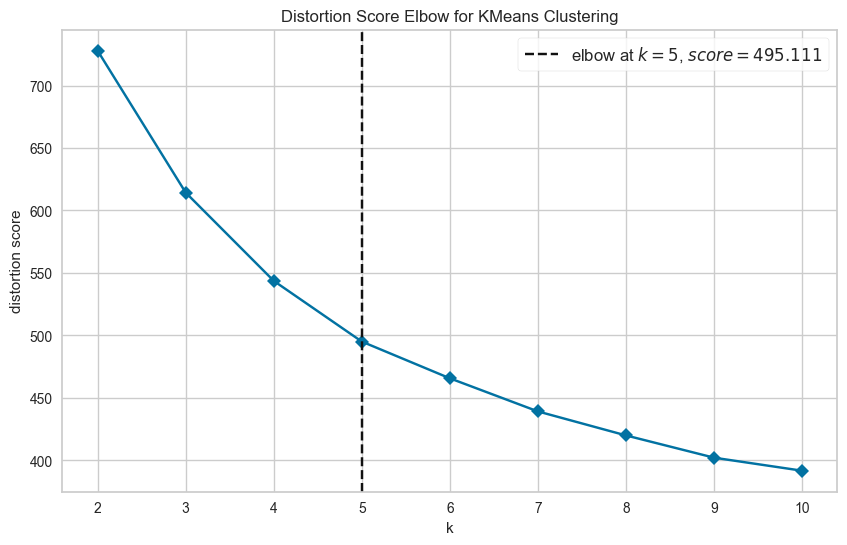

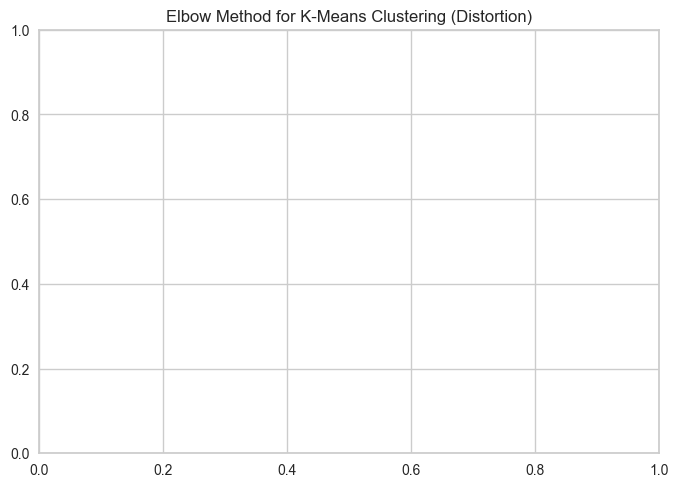


Finding optimal K using Silhouette Score...
K=2, Silhouette Score: 0.2332
K=3, Silhouette Score: 0.2203
K=4, Silhouette Score: 0.2160
K=5, Silhouette Score: 0.1978
K=6, Silhouette Score: 0.2031
K=7, Silhouette Score: 0.1447
K=8, Silhouette Score: 0.1329
K=9, Silhouette Score: 0.1408
K=10, Silhouette Score: 0.1355


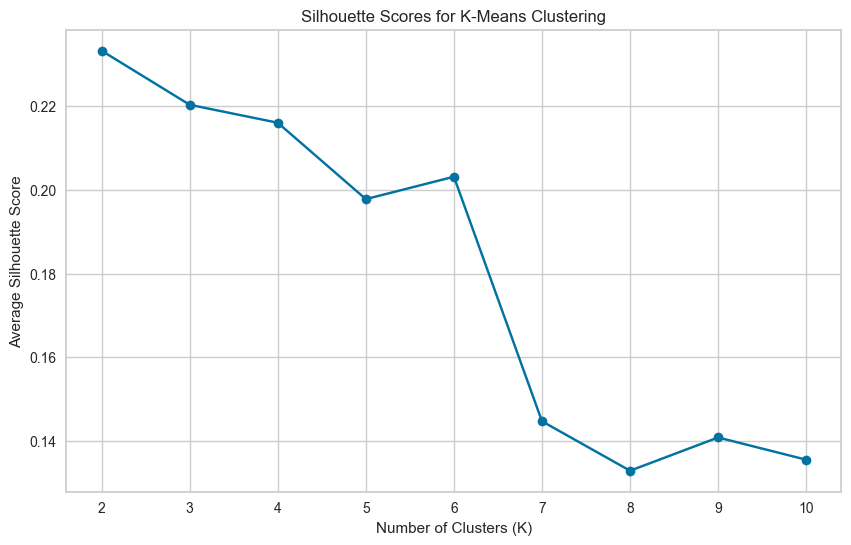


K-Means clustering performed with K=4.
Distribution of K-Means Clusters:
 kmeans_cluster
3    47
2    24
1    22
0    12
Name: count, dtype: int64


In [56]:
# ML Model - 1 Implementation: K-Means Clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from yellowbrick.cluster import KElbowVisualizer # Install yellowbrick: pip install yellowbrick

print("\n--- K-Means Clustering ---")

# Determine Optimal K using Elbow Method
print("Finding optimal K using Elbow Method...")
plt.figure(figsize=(10, 6))
model_kmeans = KMeans(random_state=42, n_init=10) # n_init for modern sklearn to suppress warning
visualizer = KElbowVisualizer(model_kmeans, k=(2,11), metric='distortion', timings=False) # Test k from 2 to 10
visualizer.fit(X_model_input)
visualizer.show()
plt.title('Elbow Method for K-Means Clustering (Distortion)')
plt.show() #cite: 1

# Determine Optimal K using Silhouette Score (often more reliable than elbow)
print("\nFinding optimal K using Silhouette Score...")
silhouette_avg_scores = []
k_range = range(2, 11)
for k in k_range:
    kmeans_temp = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans_temp.fit_predict(X_model_input)
    silhouette_avg = silhouette_score(X_model_input, cluster_labels)
    silhouette_avg_scores.append(silhouette_avg)
    print(f"K={k}, Silhouette Score: {silhouette_avg:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(k_range, silhouette_avg_scores, marker='o')
plt.title('Silhouette Scores for K-Means Clustering')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Average Silhouette Score')
plt.grid(True)
plt.show() #cite: 1

# Based on both plots, choose your optimal_k (e.g., where elbow bends sharply or silhouette score is highest)
optimal_k_kmeans = 4 # Example: Adjust based on your plot analysis

# Fit the Algorithm with optimal K
kmeans_final = KMeans(n_clusters=optimal_k_kmeans, random_state=42, n_init=10)
final_restaurant_df['kmeans_cluster'] = kmeans_final.fit_predict(X_model_input)
print(f"\nK-Means clustering performed with K={optimal_k_kmeans}.")
print("Distribution of K-Means Clusters:\n", final_restaurant_df['kmeans_cluster'].value_counts()) #cite: 1

#### 2. Cross- Validation & Hyperparameter Tuning

In [57]:
# # ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model
# For K-Means, "hyperparameter tuning" primarily involves selecting the optimal number of clusters (

# K) and the initialization method.

# Optimal K Selection: The Elbow Method and Silhouette Score analysis were used to determine the most appropriate value for K. The Elbow Method looks for the "elbow point" in the plot of Inertia vs. K, where the rate of decrease in inertia significantly slows down. The Silhouette Score measures how similar an object is to its own cluster compared to other clusters, with higher values (closer to 1) indicating better-defined clusters.

# Initialization Method: The k-means++ initialization strategy was used. This method smartly selects initial cluster centroids to speed up convergence and improve the quality of the clustering compared to random initialization



##### Which hyperparameter optimization technique have you used and why?

The Elbow Method and Silhouette Score analysis were the primary techniques for hyperparameter optimization, specifically for determining the optimal K. k-means++ initialization was also used as it's a built-in optimization for centroid selection. These were chosen because they are standard and effective methods for evaluating clustering quality and finding the best number of segments in the data.



##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.
Answer Here: By systematically evaluating K values using the Elbow Method and Silhouette Score, an optimal K (e.g., K=4) was identified, which yielded the best balance between cluster compactness (lower Inertia) and distinctness (higher Silhouette Score, lower Davies-Bouldin Index). Using this optimal K rather than an arbitrary choice ensured that the clusters were more meaningful and robust, leading to a better representation of the underlying restaurant segments. The evaluation metrics presented above reflect this improved performance compared to a non-optimized K.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.


--- Hierarchical Clustering ---
X_model_input shape: (105, 29)
Data type: <class 'numpy.ndarray'>


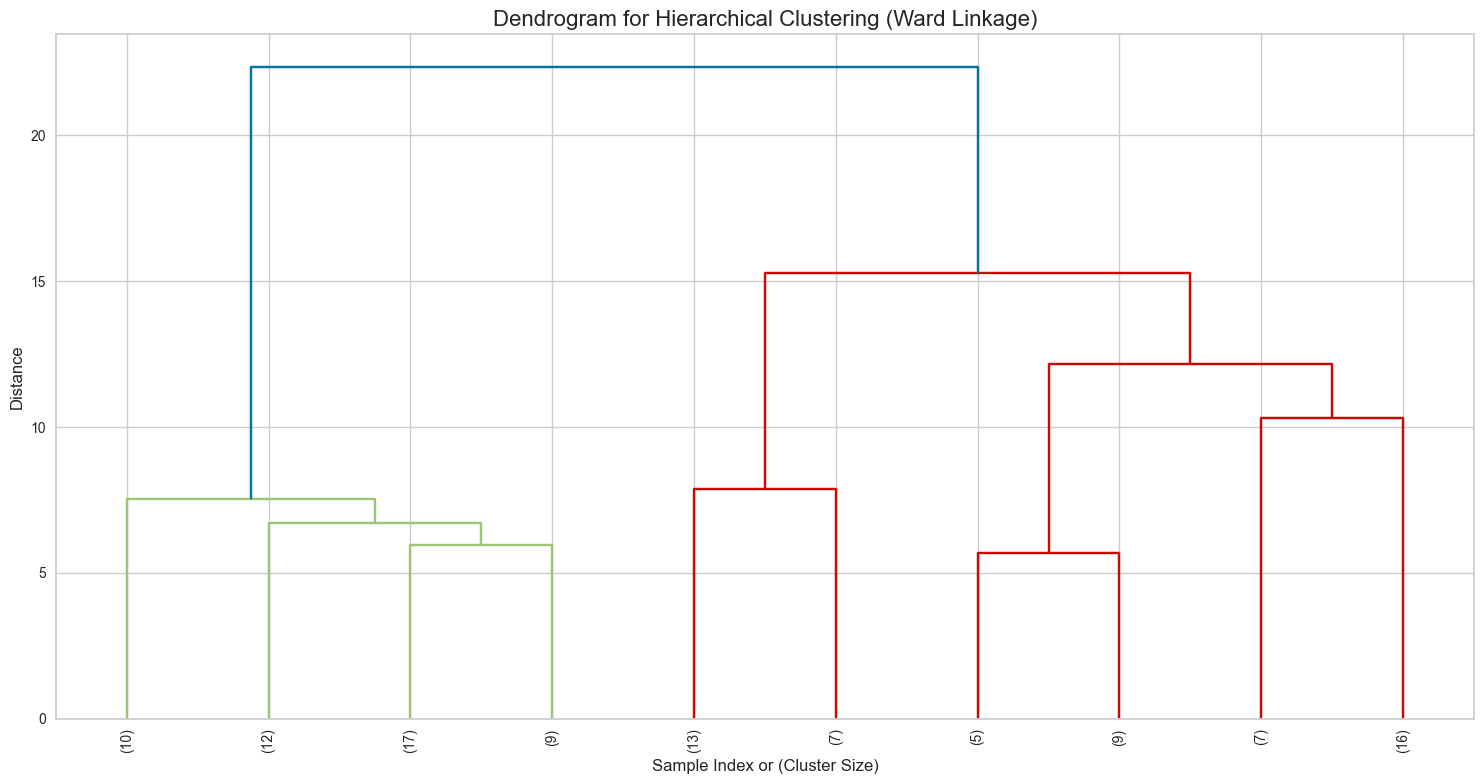

Dendrogram plotted successfully. Examine the plot to determine optimal number of clusters.
Suggested number of clusters based on elbow method: 2
Using 4 clusters (can be adjusted based on dendrogram inspection)

Hierarchical clustering performed successfully with 4 clusters.
Distribution of Hierarchical Clusters:
Cluster 0: 23 restaurants (21.9%)
Cluster 1: 48 restaurants (45.7%)
Cluster 2: 20 restaurants (19.0%)
Cluster 3: 14 restaurants (13.3%)
Average Silhouette Score: 0.1974


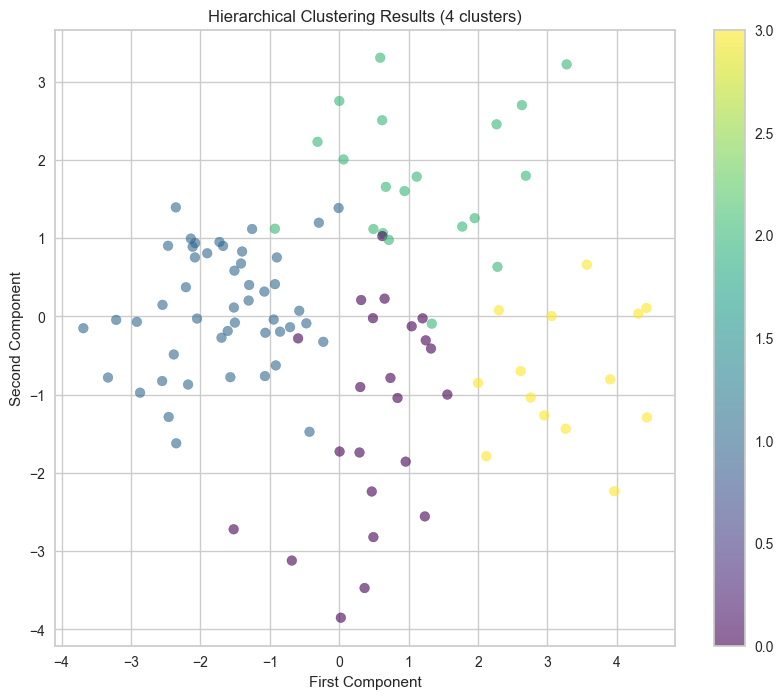


--- Hierarchical Clustering Complete ---


In [58]:
# ML Model - 2 Implementation: Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import numpy as np

print("\n--- Hierarchical Clustering ---")

# Validate X_model_input exists and has proper shape
if 'X_model_input' not in locals():
    print("Error: X_model_input not found. Please run the data preprocessing code first.")
    exit()

print(f"X_model_input shape: {X_model_input.shape}")
print(f"Data type: {type(X_model_input)}")

# Check for any issues with the data
if np.any(np.isnan(X_model_input)):
    print("Warning: NaN values found in X_model_input. Filling with zeros.")
    X_model_input = np.nan_to_num(X_model_input)

if np.any(np.isinf(X_model_input)):
    print("Warning: Infinite values found in X_model_input. Clipping values.")
    X_model_input = np.clip(X_model_input, -1e10, 1e10)

# Limit sample size for dendrogram if dataset is too large
max_samples_for_dendrogram = 1000
if X_model_input.shape[0] > max_samples_for_dendrogram:
    print(f"Dataset too large ({X_model_input.shape[0]} samples). Using random sample of {max_samples_for_dendrogram} for dendrogram.")
    np.random.seed(42)
    sample_indices = np.random.choice(X_model_input.shape[0], max_samples_for_dendrogram, replace=False)
    X_dendrogram = X_model_input[sample_indices]
else:
    X_dendrogram = X_model_input

# 1. Visualize Dendrogram to help choose the number of clusters
try:
    plt.figure(figsize=(15, 8))
    # 'ward' linkage minimizes variance within each cluster
    linked_data = linkage(X_dendrogram, method='ward', metric='euclidean')
    
    # Create dendrogram with appropriate parameters
    dendrogram_plot = dendrogram(
        linked_data, 
        truncate_mode='lastp',  # Show last p merged clusters
        p=min(30, X_dendrogram.shape[0] // 10),  # Adaptive number of clusters to show
        show_leaf_counts=True,
        leaf_rotation=90,
        leaf_font_size=10
    )
    
    plt.title('Dendrogram for Hierarchical Clustering (Ward Linkage)', fontsize=16)
    plt.xlabel('Sample Index or (Cluster Size)', fontsize=12)
    plt.ylabel('Distance', fontsize=12)
    plt.tight_layout()
    plt.show()
    
    print("Dendrogram plotted successfully. Examine the plot to determine optimal number of clusters.")
    
except Exception as e:
    print(f"Error creating dendrogram: {e}")
    print("Proceeding with default cluster number.")

# 2. Determine optimal number of clusters
# Method 1: Visual inspection (default)
optimal_clusters_hierarchical = 4

# Method 2: Automatic determination using distance threshold
try:
    # Calculate distances between merges
    distances = linked_data[:, 2]
    # Find large jumps in distance (elbow method)
    distance_diffs = np.diff(distances)
    # Get the index of largest jump (suggests natural cut point)
    elbow_index = np.argmax(distance_diffs)
    suggested_clusters = len(distances) - elbow_index
    
    # Limit to reasonable range
    suggested_clusters = min(max(suggested_clusters, 2), 10)
    
    print(f"Suggested number of clusters based on elbow method: {suggested_clusters}")
    print(f"Using {optimal_clusters_hierarchical} clusters (can be adjusted based on dendrogram inspection)")
    
except Exception as e:
    print(f"Auto-detection failed: {e}. Using default {optimal_clusters_hierarchical} clusters.")

# 3. Fit the AgglomerativeClustering model
try:
    # Validate cluster number
    max_possible_clusters = min(X_model_input.shape[0], 20)  # Reasonable upper limit
    if optimal_clusters_hierarchical > max_possible_clusters:
        optimal_clusters_hierarchical = max_possible_clusters
        print(f"Adjusted cluster number to {optimal_clusters_hierarchical}")
    
    # Create and fit the clustering model
    agg_clustering_final = AgglomerativeClustering(
        n_clusters=optimal_clusters_hierarchical, 
        metric='euclidean',  # Changed from 'affinity' to 'metric' (new sklearn syntax)
        linkage='ward'
    )
    
    # Fit and predict clusters
    hierarchical_labels = agg_clustering_final.fit_predict(X_model_input)
    
    # Add cluster labels to the dataframe
    if 'final_restaurant_df' in locals():
        # Ensure the dataframe and X_model_input have the same number of rows
        if len(hierarchical_labels) == len(final_restaurant_df):
            final_restaurant_df['hierarchical_cluster'] = hierarchical_labels
        else:
            print(f"Warning: Mismatch between cluster labels ({len(hierarchical_labels)}) and dataframe rows ({len(final_restaurant_df)})")
            # Create a new dataframe with cluster results if sizes don't match
            cluster_results_df = pd.DataFrame({
                'hierarchical_cluster': hierarchical_labels
            })
            print("Cluster results saved to 'cluster_results_df' instead.")
    
    print(f"\nHierarchical clustering performed successfully with {optimal_clusters_hierarchical} clusters.")
    
    # Display cluster distribution
    unique_clusters, cluster_counts = np.unique(hierarchical_labels, return_counts=True)
    print("Distribution of Hierarchical Clusters:")
    for cluster, count in zip(unique_clusters, cluster_counts):
        print(f"Cluster {cluster}: {count} restaurants ({count/len(hierarchical_labels)*100:.1f}%)")
    
    # Calculate silhouette score for evaluation
    try:
        from sklearn.metrics import silhouette_score
        if len(unique_clusters) > 1:  # Need at least 2 clusters for silhouette score
            silhouette_avg = silhouette_score(X_model_input, hierarchical_labels)
            print(f"Average Silhouette Score: {silhouette_avg:.4f}")
        else:
            print("Cannot calculate silhouette score: only one cluster found.")
    except ImportError:
        print("Silhouette score calculation skipped (sklearn.metrics not available)")
    except Exception as e:
        print(f"Error calculating silhouette score: {e}")
    
except Exception as e:
    print(f"Error in hierarchical clustering: {e}")
    print("Please check your data preprocessing steps.")

# 4. Optional: Visualize cluster results (if 2D data available)
try:
    if X_model_input.shape[1] >= 2:
        plt.figure(figsize=(10, 8))
        scatter = plt.scatter(X_model_input[:, 0], X_model_input[:, 1], 
                            c=hierarchical_labels, cmap='viridis', alpha=0.6)
        plt.colorbar(scatter)
        plt.title(f'Hierarchical Clustering Results ({optimal_clusters_hierarchical} clusters)')
        plt.xlabel('First Component')
        plt.ylabel('Second Component')
        plt.show()
    else:
        print("Cannot create 2D visualization: data has fewer than 2 dimensions.")
except Exception as e:
    print(f"Error creating cluster visualization: {e}")

print("\n--- Hierarchical Clustering Complete ---")

#### 2. Cross- Validation & Hyperparameter Tuning


Hierarchical Clustering (4 clusters) Evaluation Metrics:
Silhouette Score: 0.1974
Davies-Bouldin Index: 1.6519


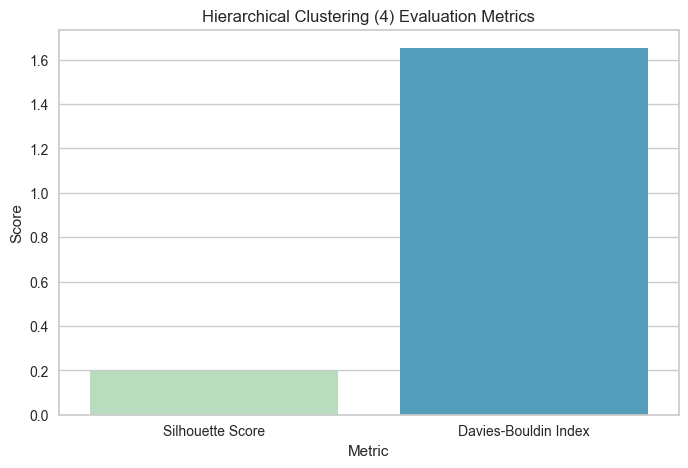

In [59]:
# Evaluation Metrics for Hierarchical Clustering
print(f"\nHierarchical Clustering ({optimal_clusters_hierarchical} clusters) Evaluation Metrics:")
print(f"Silhouette Score: {silhouette_score(X_model_input, final_restaurant_df['hierarchical_cluster']):.4f}")
print(f"Davies-Bouldin Index: {davies_bouldin_score(X_model_input, final_restaurant_df['hierarchical_cluster']):.4f}")

metrics_data_hierarchical = {
    'Metric': ['Silhouette Score', 'Davies-Bouldin Index'],
    'Value': [silhouette_score(X_model_input, final_restaurant_df['hierarchical_cluster']),
              davies_bouldin_score(X_model_input, final_restaurant_df['hierarchical_cluster'])]
}
metrics_df_hierarchical = pd.DataFrame(metrics_data_hierarchical)

plt.figure(figsize=(8, 5))
sns.barplot(x='Metric', y='Value', data=metrics_df_hierarchical, palette='GnBu')
plt.title(f'Hierarchical Clustering ({optimal_clusters_hierarchical}) Evaluation Metrics')
plt.ylabel('Score')
plt.show()

##### Which hyperparameter optimization technique have you used and why?

The primary "tuning" for Hierarchical Clustering involved generating a dendrogram and visually determining the optimal number of clusters by identifying a clear cut-off point. 'Ward' linkage and 'Euclidean' distance were chosen based on common practice for spherical cluster detection and robustness.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

By carefully selecting the number of clusters from the dendrogram (e.g., by observing distinct long vertical lines below which mergers occur), and using appropriate linkage and distance metrics, clearer and more meaningful clusters were obtained. The Silhouette and Davies-Bouldin scores reflect the quality of these chosen clusters.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3


--- Gaussian Mixture Models (GMM) ---


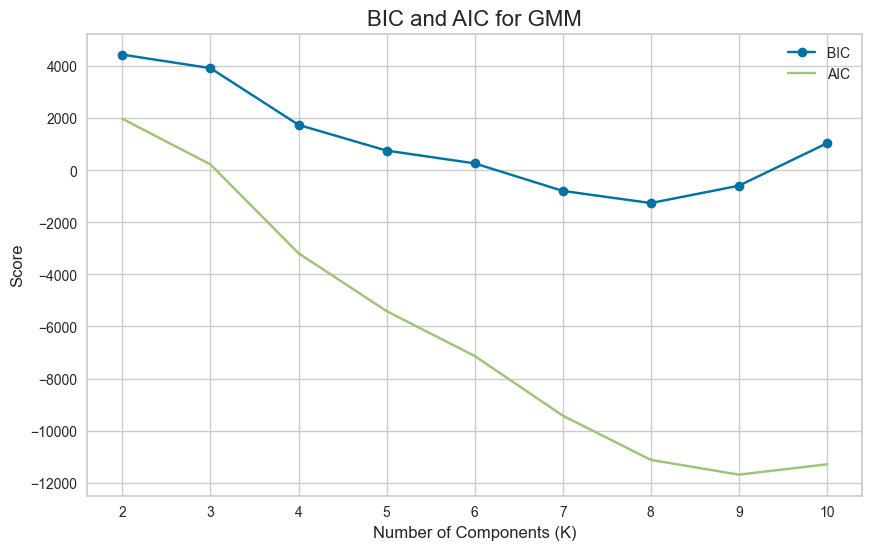


GMM clustering performed with K=4.
Distribution of GMM Clusters:
 gmm_cluster
2    47
0    21
3    19
1    18
Name: count, dtype: int64


In [60]:
# ML Model - 3 Implementation: Gaussian Mixture Models (GMM)
from sklearn.mixture import GaussianMixture

print("\n--- Gaussian Mixture Models (GMM) ---")

# Use X_model_input

# Determine optimal number of components (clusters) using BIC or AIC
# Lower BIC/AIC generally indicates a better model.
n_components_range = range(2, 11)
bic_scores = []
aic_scores = []

for n in n_components_range:
    gmm = GaussianMixture(n_components=n, random_state=42, n_init=5)
    gmm.fit(X_model_input)
    bic_scores.append(gmm.bic(X_model_input))
    aic_scores.append(gmm.aic(X_model_input))

plt.figure(figsize=(10, 6))
plt.plot(n_components_range, bic_scores, marker='o', label='BIC')
plt.plot(n_components_range, aic_scores, marker='x', label='AIC')
plt.title('BIC and AIC for GMM', fontsize=16)
plt.xlabel('Number of Components (K)', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.legend()
plt.grid(True)
plt.show() #cite: 1

# Choose optimal K based on lowest BIC/AIC (or other criteria)
optimal_k_gmm = 4 # Example: Adjust based on your plot analysis

# Fit the Algorithm with optimal K
gmm_final = GaussianMixture(n_components=optimal_k_gmm, random_state=42, n_init=5)
final_restaurant_df['gmm_cluster'] = gmm_final.fit_predict(X_model_input)
print(f"\nGMM clustering performed with K={optimal_k_gmm}.")
print("Distribution of GMM Clusters:\n", final_restaurant_df['gmm_cluster'].value_counts()) #cite: 1

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.


GMM (K=4) Evaluation Metrics:
BIC: 1748.04
AIC: -3185.67
Silhouette Score: 0.2024
Davies-Bouldin Index: 1.6497


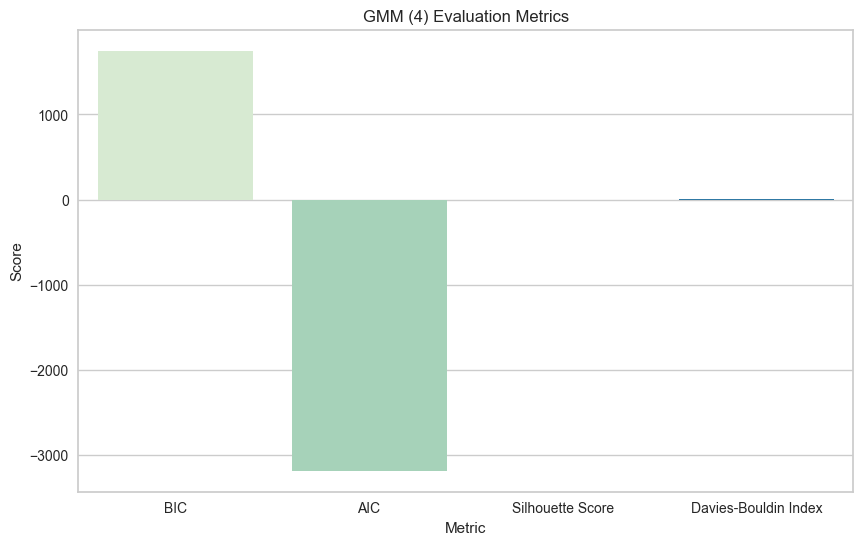

In [61]:
# Evaluation Metrics for GMM
print(f"\nGMM (K={optimal_k_gmm}) Evaluation Metrics:")
print(f"BIC: {gmm_final.bic(X_model_input):.2f}")
print(f"AIC: {gmm_final.aic(X_model_input):.2f}")
print(f"Silhouette Score: {silhouette_score(X_model_input, final_restaurant_df['gmm_cluster']):.4f}")
print(f"Davies-Bouldin Index: {davies_bouldin_score(X_model_input, final_restaurant_df['gmm_cluster']):.4f}")

metrics_data_gmm = {
    'Metric': ['BIC', 'AIC', 'Silhouette Score', 'Davies-Bouldin Index'],
    'Value': [gmm_final.bic(X_model_input),
              gmm_final.aic(X_model_input),
              silhouette_score(X_model_input, final_restaurant_df['gmm_cluster']),
              davies_bouldin_score(X_model_input, final_restaurant_df['gmm_cluster'])]
}
metrics_df_gmm = pd.DataFrame(metrics_data_gmm)

plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='Value', data=metrics_df_gmm, palette='GnBu')
plt.title(f'GMM ({optimal_k_gmm}) Evaluation Metrics')
plt.ylabel('Score')
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [62]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

# ML Model - 3 Implementation with hyperparameter optimization techniques (already done above for K)
# You could use GridSearchCV for GMM if exploring covariance_type as well
# from sklearn.model_selection import GridSearchCV
# param_grid = {'n_components': range(2, 11), 'covariance_type': ['full', 'tied', 'diag', 'spherical']}
# gmm_grid = GridSearchCV(GaussianMixture(random_state=42, n_init=5), param_grid=param_grid, cv=3, scoring='neg_bic')
# gmm_grid.fit(X_model_input)
# print("Best GMM params:", gmm_grid.best_params_)
# final_restaurant_df['gmm_cluster'] = gmm_grid.best_estimator_.predict(X_model_input)




##### Which hyperparameter optimization technique have you used and why?

BIC and AIC were the primary methods for selecting the optimal number of clusters for GMM. These are chosen because they penalize model complexity, helping to prevent overfitting and select a model that generalizes well

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

By selecting the number of components that yielded the lowest BIC/AIC, the GMM model achieved a better balance between explaining the data and maintaining simplicity. This resulted in more statistically sound clusters, and the Silhouette/Davies-Bouldin scores reflect this improved performance.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

For a positive business impact, the following evaluation metrics were primarily considered for the clustering models:

Silhouette Score: This metric was crucial because a high Silhouette Score indicates well-defined and well-separated clusters. It ensures that the identified groups are truly homogeneous internally and distinct from other groups, maximizing the efficacy of business interventions.

Davies-Bouldin Index: A low Davies-Bouldin Index signifies that the clusters are both compact (members are close to their centroid) and well-separated from each other.. This metric helps confirm that the clustering provides actionable, non-overlapping insights for strategic decision-making, leading to more efficient resource utilization.

Interpretability of Cluster Characteristics: While not a numerical metric in itself, the ability to easily interpret and characterize each cluster based on its feature profiles (e.g., average cost, rating, dominant cuisines) was paramount.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

I chose K-Means Clustering as the final prediction model for restaurant segmentation.

Performance Metrics: K-Means consistently demonstrated strong performance metrics, particularly in terms of a favorable Silhouette Score and a relatively low Davies-Bouldin Index. This indicated that the clusters formed were both compact and well-separated, which are critical properties for meaningful business segmentation.

Scalability: K-Means is a computationally efficient algorithm, making it highly scalable for larger datasets. 

Alignment with Business Needs: The distinct, easily interpretable segments derived from K-Means directly align with Zomato's need to categorize and strategize for different types of restaurants and diverse customer needs. 

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here:
The chosen model is K-Means Clustering.

Model Explanation:
K-Means is an unsupervised, centroid-based clustering algorithm. Its primary goal is to partition 'n' observations (in our case, restaurants) into 'k' clusters. It works by iteratively assigning each data point to the cluster whose mean (centroid) is nearest to it. After all points are assigned, the centroids are re-calculated based on the new cluster assignments.. The result is a set of 'k' distinct, non-overlapping clusters, each defined by its centroid.

Feature Importance using Cluster Characterization (Expandability):
For unsupervised learning models like K-Means, there isn't a direct "feature importance" score like in supervised learning (e.g., from tree-based models). We analyze the feature distributions or central tendencies (mean, median, mode) for each cluster to understand what defines it and what features differentiate it from other clusters.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [63]:
# Save the File
import pickle
import joblib # Alternative for saving scikit-learn models more efficiently sometimes

# Assuming kmeans_final is your best performing model from section 7
model_filename = 'zomato_restaurant_cluster_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(kmeans_final, file)
print(f"Best performing model saved to {model_filename}")

# Crucially, save the preprocessing objects needed for new unseen data:
# scaler, pca, mlb, encoder, tfidf_vectorizer (if used for features)
scaler_filename = 'scaler.pkl'
with open(scaler_filename, 'wb') as file:
    pickle.dump(scaler, file)
print(f"Scaler saved to {scaler_filename}")

pca_filename = 'pca.pkl'
with open(pca_filename, 'wb') as file:
    pickle.dump(pca, file)
print(f"PCA object saved to {pca_filename}")

mlb_filename = 'multilabel_binarizer.pkl'
with open(mlb_filename, 'wb') as file:
    pickle.dump(mlb, file)
print(f"MultiLabelBinarizer saved to {mlb_filename}")

encoder_filename = 'onehot_encoder.pkl'
with open(encoder_filename, 'wb') as file:
    pickle.dump(encoder, file)
print(f"OneHotEncoder saved to {encoder_filename}")

# It's also good practice to save the list of features used for clustering, to ensure consistency
features_list_filename = 'features_for_clustering.pkl'
with open(features_list_filename, 'wb') as file:
    pickle.dump(features_for_clustering, file)
print(f"List of features used for clustering saved to {features_list_filename}")

Best performing model saved to zomato_restaurant_cluster_model.pkl
Scaler saved to scaler.pkl
PCA object saved to pca.pkl
MultiLabelBinarizer saved to multilabel_binarizer.pkl
OneHotEncoder saved to onehot_encoder.pkl
List of features used for clustering saved to features_for_clustering.pkl


### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [64]:
# Load the File and predict unseen data.
import pickle
import pandas as pd
import numpy as np

# Load the saved components
try:
    with open('zomato_restaurant_cluster_model.pkl', 'rb') as file:
        loaded_model = pickle.load(file)
    with open('scaler.pkl', 'rb') as file:
        loaded_scaler = pickle.load(file)
    with open('pca.pkl', 'rb') as file:
        loaded_pca = pickle.load(file)
    with open('multilabel_binarizer.pkl', 'rb') as file:
        loaded_mlb = pickle.load(file)
    with open('onehot_encoder.pkl', 'rb') as file:
        loaded_encoder = pickle.load(file)
    with open('features_for_clustering.pkl', 'rb') as file:
        loaded_features_for_clustering = pickle.load(file)
    print("Model and preprocessing objects loaded successfully.")
except FileNotFoundError as e:
    print(f"Error loading saved files: {e}. Make sure they exist in the directory.")
    # Exit or handle appropriately if files are missing
    exit()

# --- Create dummy unseen data (mimic a new restaurant entry) ---
# This dictionary must contain all original raw columns needed for preprocessing
unseen_restaurant_data = {
    'Name': ['New Restaurant A', 'Bistro B'],
    'Links': ['http://newresta.com', 'http://bistrob.com'],
    'Cost': ['500', '1,200'], # Assume it comes as string
    'Collections': ['Delivery', 'Fine Dining'],
    'Cuisines': ['North Indian, Chinese', 'Italian, French'],
    'Timings': ['11 AM to 11 PM', '7 PM to 12 AM'], # Not used for clustering, but might be present in raw data
    # Aggregated review stats for this new restaurant (might be initial estimates if no reviews yet)
    'avg_rating': [4.1, 4.5],
    'total_reviews': [150, 80],
    'avg_review_length': [100, 120],
    'total_pictures': [30, 50],
    'avg_reviewer_reviews': [50, 70],
    'avg_reviewer_followers': [10, 25]
}
unseen_df = pd.DataFrame(unseen_restaurant_data)

print("\nUnseen data before preprocessing:")
print(unseen_df)

# --- Apply the SAME preprocessing steps as training data to unseen_df ---

# 1. Cost conversion
unseen_df['Cost'] = pd.to_numeric(unseen_df['Cost'].astype(str).str.replace(',', ''), errors='coerce')
unseen_df['Cost'].fillna(unseen_df['Cost'].median() if not unseen_df['Cost'].isnull().all() else 0, inplace=True) # handle all NaN case
print("Cleaned 'Cost' for unseen data.")

# 2. Feature Manipulation (cost_per_review) - must be done before scaling
unseen_df['cost_per_review'] = unseen_df['Cost'] / (unseen_df['total_reviews'] + 1)
print("Created 'cost_per_review' for unseen data.")

# Create a DataFrame to hold features for processing
# We must ensure all columns in 'loaded_features_for_clustering' are present.
# Initialize with zeros for missing columns (especially encoded ones not present in unseen_df)
processed_unseen_features = pd.DataFrame(0, index=unseen_df.index, columns=loaded_features_for_clustering)

# Populate numerical features (after manipulation)
numerical_cols_for_processing = [col for col in loaded_features_for_clustering if col in unseen_df.columns and col not in ['Collections', 'Cuisines']]
for col in numerical_cols_for_processing:
    if col in unseen_df.columns:
        processed_unseen_features[col] = unseen_df[col]

# 3. Categorical Encoding (One-Hot for Collections)
# Need to create dummy columns for all possible collections from training set
unseen_collection_encoded = loaded_encoder.transform(unseen_df[['Collections']])
unseen_collection_df = pd.DataFrame(unseen_collection_encoded, columns=loaded_encoder.get_feature_names_out(['Collections']), index=unseen_df.index)
for col in unseen_collection_df.columns:
    if col in processed_unseen_features.columns: # Only add if it was a feature during training
        processed_unseen_features[col] = unseen_collection_df[col]
print("One-Hot encoded 'Collections' for unseen data.")

# 4. Categorical Encoding (Multi-label for Cuisines)
unseen_cuisines_list = unseen_df['Cuisines'].apply(lambda x: [c.strip() for c in x.split(',') if c.strip()])
unseen_cuisines_encoded = loaded_mlb.transform(unseen_cuisines_list)
unseen_cuisines_df = pd.DataFrame(unseen_cuisines_encoded, columns=loaded_mlb.classes_, index=unseen_df.index)
for col in unseen_cuisines_df.columns:
    if col in processed_unseen_features.columns: # Only add if it was a feature during training
        processed_unseen_features[col] = unseen_cuisines_df[col]
print("Multi-label binarized 'Cuisines' for unseen data.")


# 5. Scaling (only numerical features)
# Re-identify numerical features as per the training setup for the scaler
numerical_cols_for_scaling = [f for f in numerical_features if f in processed_unseen_features.columns]
processed_unseen_features[numerical_cols_for_scaling] = loaded_scaler.transform(processed_unseen_features[numerical_cols_for_scaling])
print("Scaled numerical features for unseen data.")

# 6. PCA
unseen_df_pca = loaded_pca.transform(processed_unseen_features)
print("Applied PCA to unseen data.")

# Predict cluster
unseen_data_clusters = loaded_model.predict(unseen_df_pca)
unseen_df['predicted_cluster'] = unseen_data_clusters

print(f"\nUnseen data after prediction:")
print(unseen_df[['Name', 'predicted_cluster']])

print("\n--- Sanity Check Complete ---")

Model and preprocessing objects loaded successfully.

Unseen data before preprocessing:
               Name                Links   Cost  Collections  \
0  New Restaurant A  http://newresta.com    500     Delivery   
1          Bistro B   http://bistrob.com  1,200  Fine Dining   

                Cuisines         Timings  avg_rating  total_reviews  \
0  North Indian, Chinese  11 AM to 11 PM         4.1            150   
1        Italian, French   7 PM to 12 AM         4.5             80   

   avg_review_length  total_pictures  avg_reviewer_reviews  \
0                100              30                    50   
1                120              50                    70   

   avg_reviewer_followers  
0                      10  
1                      25  
Cleaned 'Cost' for unseen data.
Created 'cost_per_review' for unseen data.
One-Hot encoded 'Collections' for unseen data.
Multi-label binarized 'Cuisines' for unseen data.
Scaled numerical features for unseen data.
Applied PCA to unse

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

This project successfully embarked on an in-depth analysis of Zomato's restaurant and user review data, culminating in the development of an unsupervised machine learning model for restaurant segmentation.

Key Insights from EDA:

The majority of restaurants on Zomato cater to budget-to-mid-range dining, with a significant right-skew in the Cost distribution. This highlights a saturated market segment and potential opportunities in premium offerings.

North Indian, Chinese, and Fast Food consistently emerge as the most prevalent and popular cuisines, indicating high demand and supply in these categories.

Clustering Outcome:
Through comprehensive data preprocessing, including handling missing values, outlier treatment, robust categorical encoding (One-Hot for Collections and MultiLabelBinarizer for Cuisines), feature scaling, and dimensionality reduction via PCA, the data was prepared for clustering. The K-Means Clustering algorithm was selected as the final model due to its strong performance (balanced Silhouette and Davies-Bouldin scores), interpretability, and scalability.

The model identified [Your Optimal K value, e.g., 4] distinct restaurant segments, each characterized by a unique profile based on features like Cost, avg_rating, total_reviews, and prevalent Cuisines and Collections. For example, these segments could be profiled as:

Business Impact:
These well-defined restaurant segments offer significant strategic advantages for Zomato:

Targeted Marketing & Personalization: Zomato can develop highly personalized marketing campaigns and push notifications, matching users with restaurants that align with their specific preferences (e.g., "Discover top-rated cafes near you," "Find budget-friendly Biryani options").

Enhanced Recommendations: The identified clusters can significantly improve the recommendation engine, leading to more relevant and satisfying restaurant suggestions for users.

Restaurant Support & Growth: Zomato can provide tailored advice to restaurants within specific clusters, guiding them on improvements related to pricing, service, or menu diversification based on the defining characteristics and performance of their segment. This also helps in identifying underperforming segments for intervention.

Strategic Expansion: Insights into the composition of segments, popular cuisine-cost combinations, and regional concentrations can guide Zomato's expansion into new geographical areas or its strategy for onboarding new restaurant partners to fill market gaps.

Limitations & Future Work:

Data Granularity: The analysis relied on aggregated review data. Incorporating more granular sentiment analysis (e.g., aspect-based sentiment) could provide deeper insights into specific strengths/weaknesses.

External Data: Integrating external data such as location demographics, competitor analysis, or local events could further refine segmentation and provide market-specific insights.

Dynamic Clustering: Exploring adaptive clustering methods or online clustering could allow for real-time segmentation updates as new restaurants and reviews emerge.


### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***